# Stock Exchange Data Analysis


## Import Libraries


In [138]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso


## Data Cleaning

### Load the Data

In [139]:
# Load the stock data and check whether it has been loaded correctly.
data = pd.read_csv(
    "data/index_data.csv",
    on_bad_lines="error",
)
print("Data Info Overview:")
data.info()


Data Info Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


### Convert Date Column to Datetime

In [140]:
data["Date"] = pd.to_datetime(data["Date"])
print("Data Info Overview After Date Type Conversion:")
data.info()


Data Info Overview After Date Type Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Index      112457 non-null  object        
 1   Date       112457 non-null  datetime64[ns]
 2   Open       110253 non-null  float64       
 3   High       110253 non-null  float64       
 4   Low        110253 non-null  float64       
 5   Close      110253 non-null  float64       
 6   Adj Close  110253 non-null  float64       
 7   Volume     110253 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.9+ MB


### Remove Incomplete Rows

In [141]:
# Count how many missing values are in each column.
print("Number of Missing Values Per Column:")
display(data.isnull().sum())

# Remove rows with missing values.
data.dropna(axis=0, how="any", inplace=True)

# Check that the missing values have been removed.
print("Number of Missing Values Per Column After Cleaning:")
display(data.isnull().sum())


Number of Missing Values Per Column:


Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

Number of Missing Values Per Column After Cleaning:


Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Data Exploration


### Calculate Distribution of Attributes

In [142]:
data.describe()

Open           High            Low          Close  \
count  110253.000000  110253.000000  110253.000000  110253.000000   
mean     7658.515222    7704.372961    7608.000422    7657.545872   
std      9011.478913    9066.638548    8954.506981    9011.510444   
min        54.869999      54.869999      54.869999      54.869999   
25%      1855.030029    1864.510010    1843.979980    1855.060059   
50%      5194.089844    5226.279785    5154.049805    5194.750000   
75%     10134.299810   10207.820310   10060.349610   10134.830080   
max     68775.062500   69403.750000   68516.992190   68775.062500   

           Adj Close        Volume  
count  110253.000000  1.102530e+05  
mean     7657.351729  1.273975e+09  
std      9011.608900  4.315783e+09  
min        54.869999  0.000000e+00  
25%      1854.179565  0.000000e+00  
50%      5194.750000  4.329000e+05  
75%     10134.830080  1.734314e+08  
max     68775.062500  9.440374e+10

### Filter the Data

In [143]:
print("\nData After Removing Columns:")
# TODO: Revisit this.
# Restrict analysis to focus on the adjusted close price of each index per day.
# nya_data = data[["Date", "Index", "Adj Close"]]
data = data
display(data)



Data After Removing Columns:


Index       Date         Open         High          Low        Close  \
0        NYA 1965-12-31   528.690002   528.690002   528.690002   528.690002   
1        NYA 1966-01-03   527.210022   527.210022   527.210022   527.210022   
2        NYA 1966-01-04   527.840027   527.840027   527.840027   527.840027   
3        NYA 1966-01-05   531.119995   531.119995   531.119995   531.119995   
4        NYA 1966-01-06   532.070007   532.070007   532.070007   532.070007   
...      ...        ...          ...          ...          ...          ...   
112452  N100 2021-05-27  1241.119995  1251.910034  1241.119995  1247.069946   
112453  N100 2021-05-28  1249.469971  1259.209961  1249.030029  1256.599976   
112454  N100 2021-05-31  1256.079956  1258.880005  1248.140015  1248.930054   
112455  N100 2021-06-01  1254.609985  1265.660034  1254.609985  1258.579956   
112456  N100 2021-06-02  1258.489990  1263.709961  1258.239990  1263.619995   

          Adj Close       Volume  
0        528.690002          0.0  
1        527.210022          0.0  
2        527.840027          0.0  
3        531.119995          0.0  
4        532.070007          0.0  
...             ...          ...  
112452  1247.069946  379696400.0  
112453  1256.599976  160773400.0  
112454  1248.930054   91173700.0  
112455  1258.579956  155179900.0  
112456  1263.619995  148465000.0  

[110253 rows x 8 columns]

### Explore the Index Information

In [144]:
# Load the index info to understand what each index ticker represents.
index_info = pd.read_csv(
    "data/index_info.csv",
    on_bad_lines="error",
)
display(index_info)


Region                          Exchange      Index Currency
0   United States           New York Stock Exchange        NYA      USD
1   United States                            NASDAQ       IXIC      USD
2       Hong Kong          Hong Kong Stock Exchange        HSI      HKD
3           China           Shanghai Stock Exchange  000001.SS      CNY
4           Japan              Tokyo Stock Exchange       N225      JPY
5          Europe                          Euronext       N100      EUR
6           China           Shenzhen Stock Exchange  399001.SZ      CNY
7          Canada            Toronto Stock Exchange     GSPTSE      CAD
8           India  National Stock Exchange of India       NSEI      INR
9         Germany          Frankfurt Stock Exchange      GDAXI      EUR
10          Korea                    Korea Exchange       KS11      KRW
11    Switzerland                SIX Swiss Exchange       SSMI      CHF
12         Taiwan             Taiwan Stock Exchange       TWII      TWD
13   South Africa       Johannesburg Stock Exchange    J203.JO      ZAR

### Split the Data by Index


In [145]:
# Split the data set by 'Index' column.
data_frames_per_index = {
    key: data.loc[value] for key, value in data.groupby("Index").groups.items()
}

# Show how many rows of data are available for each index.
print("Sample Size Per Index:")
for index, data_frame in data_frames_per_index.items():
    print(f"{index}: {len(data_frame)}")


Sample Size Per Index:
000001.SS: 5791
399001.SZ: 5760
GDAXI: 8438
GSPTSE: 10526
HSI: 8492
IXIC: 12690
J203.JO: 2346
KS11: 6029
N100: 5474
N225: 13874
NSEI: 3346
NYA: 13947
SSMI: 7671
TWII: 5869


## Feature Engineering


### Calculate Simple Moving Averages


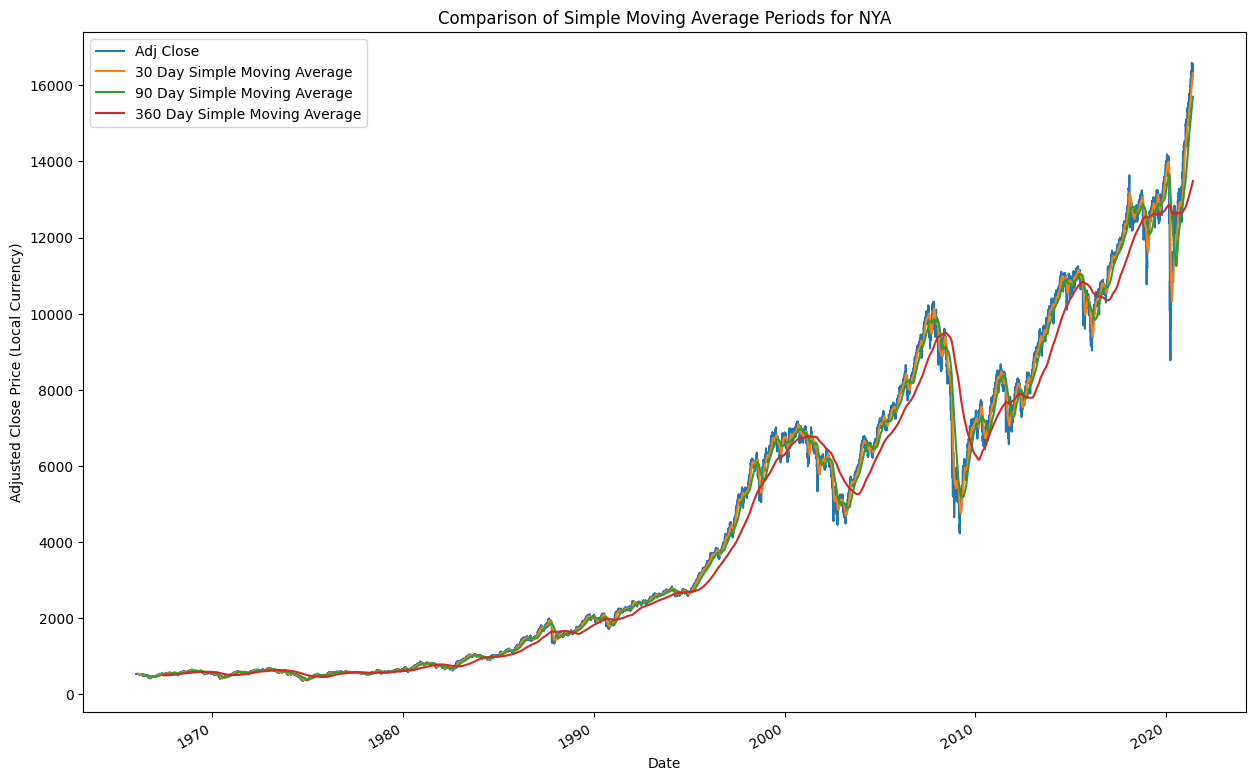

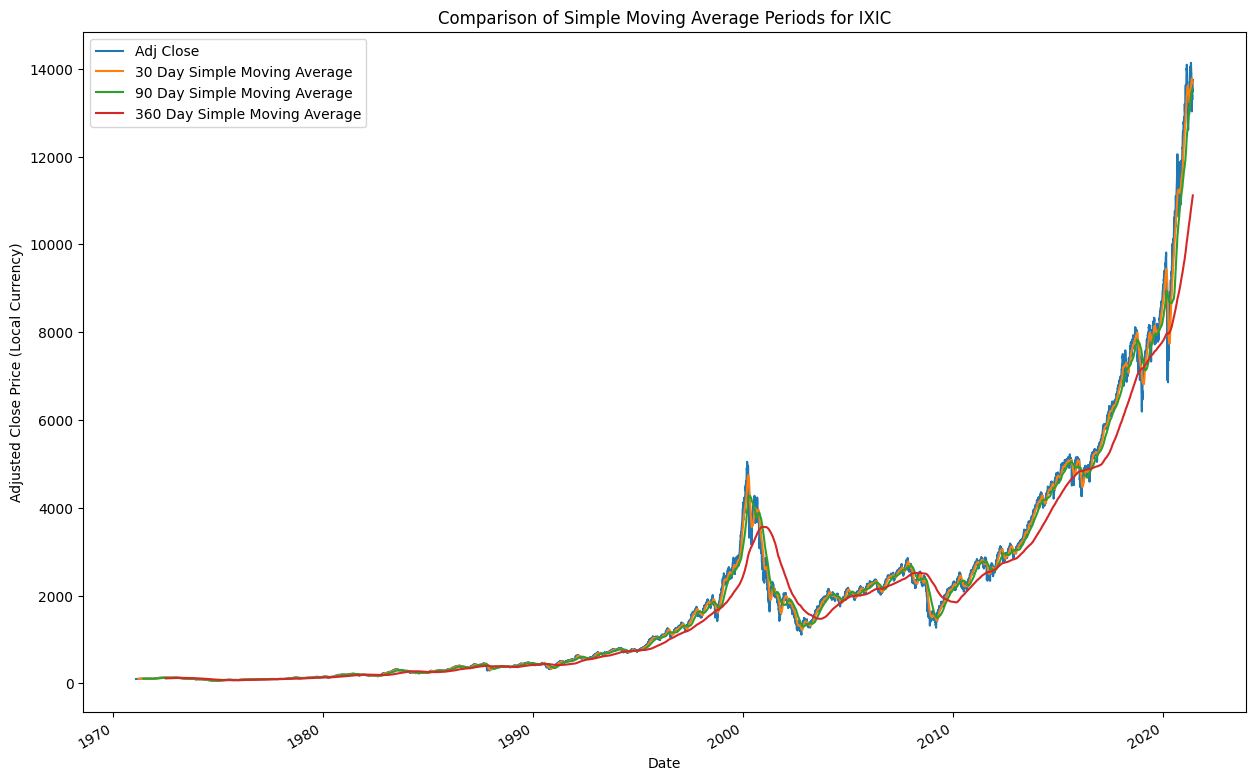

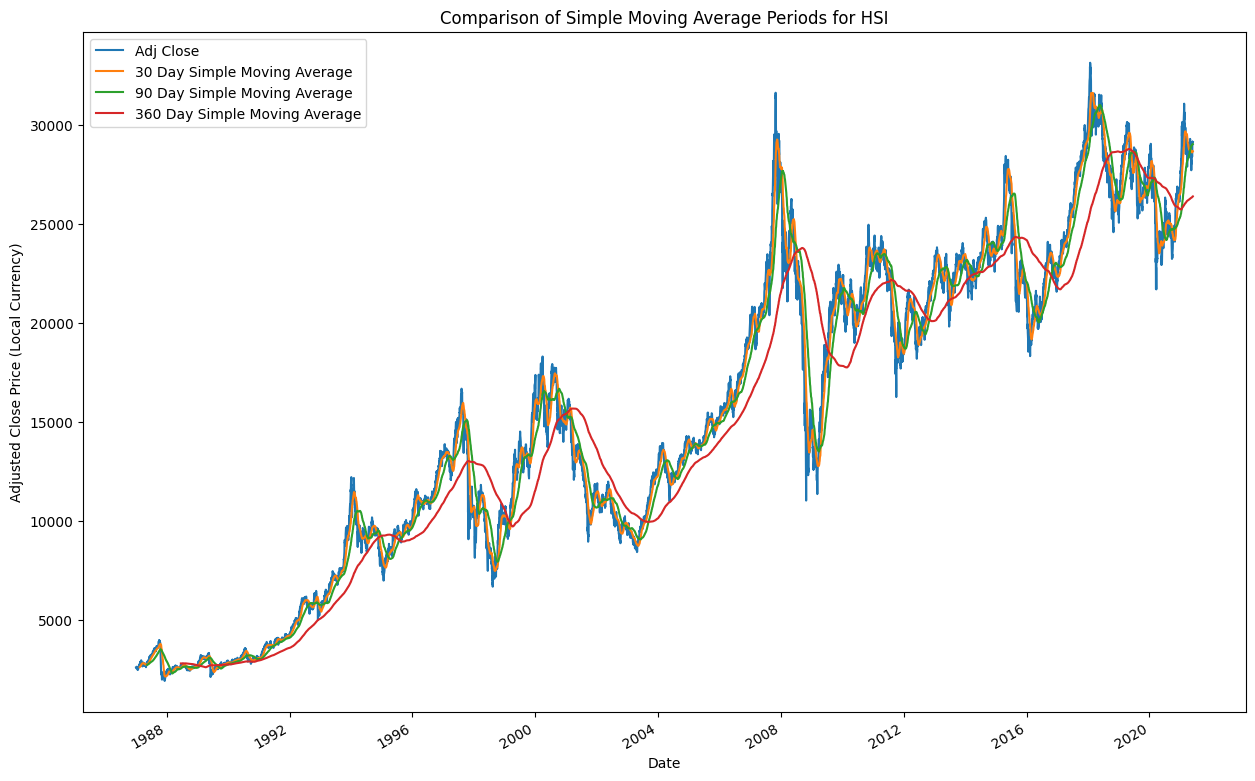

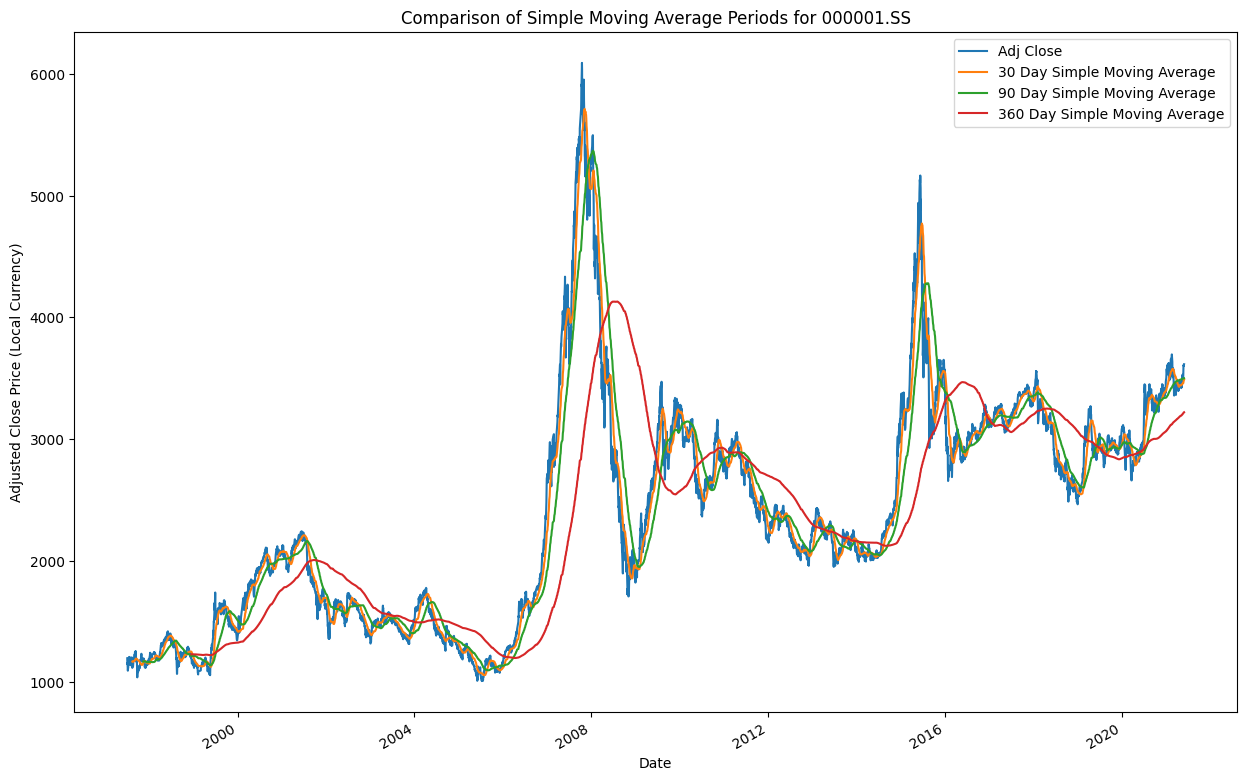

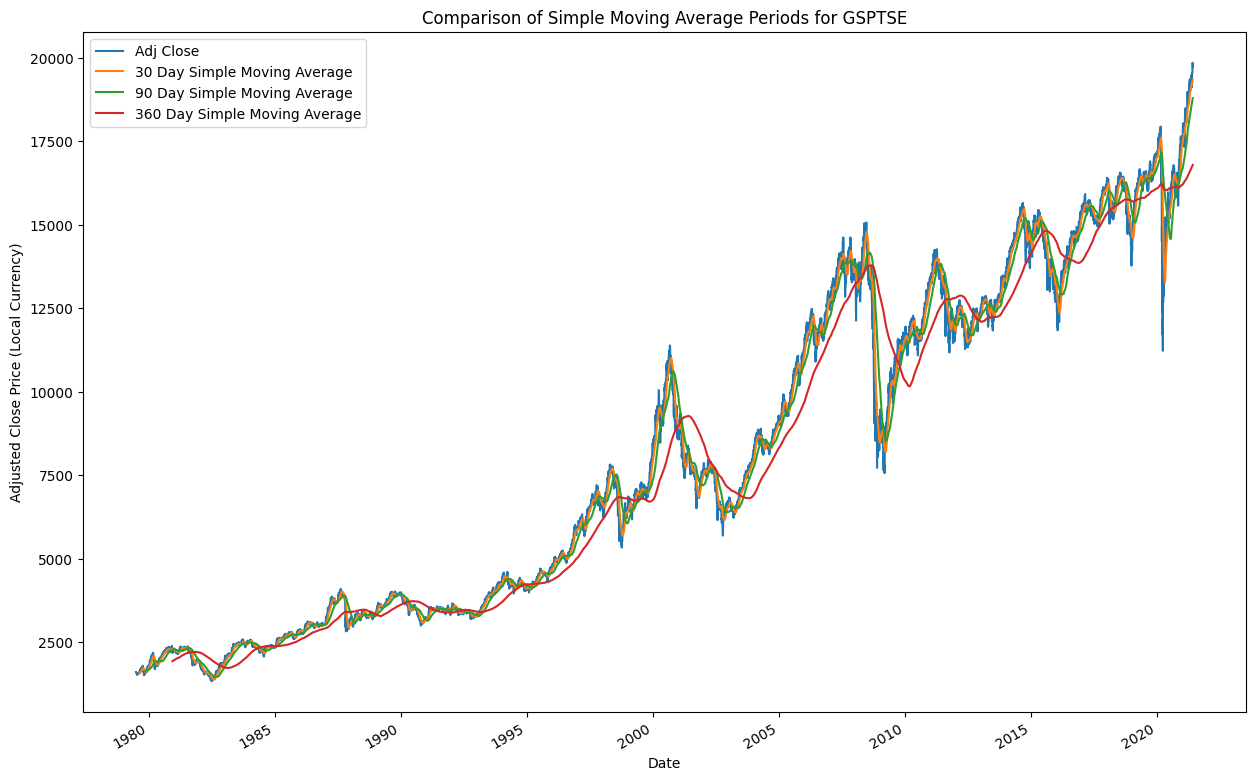

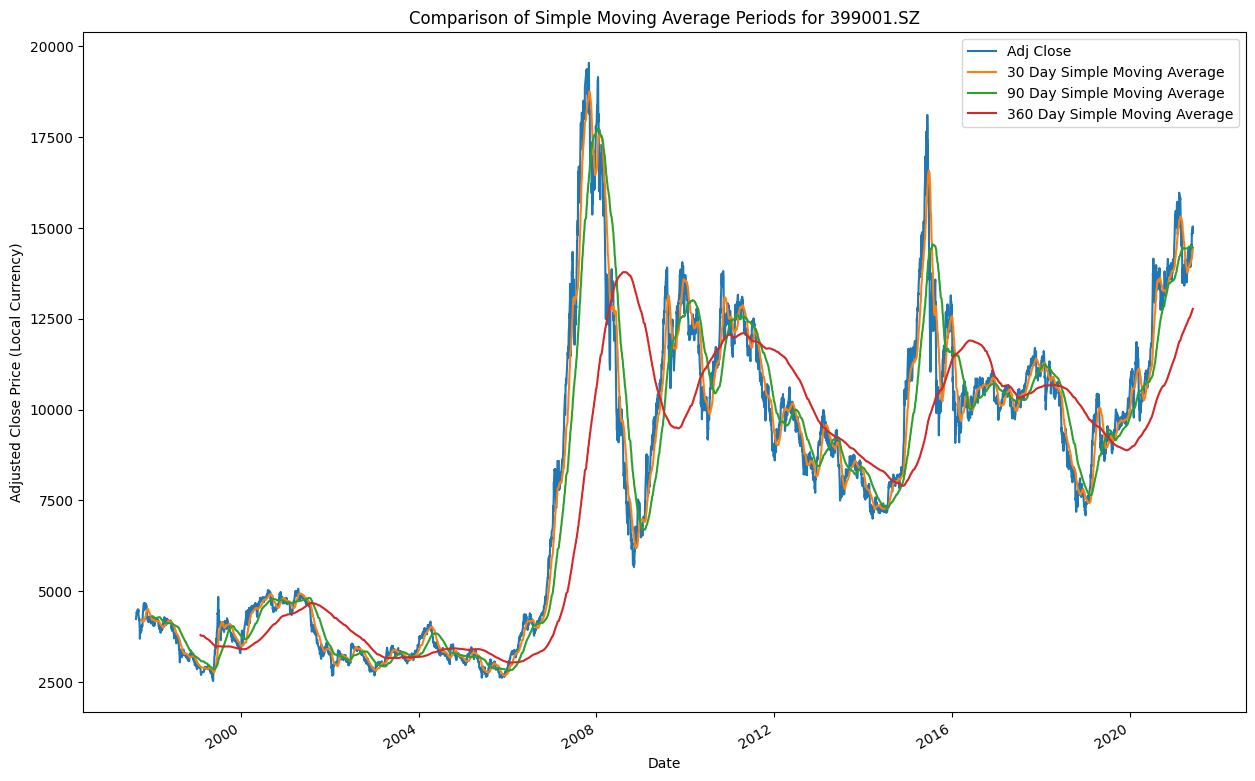

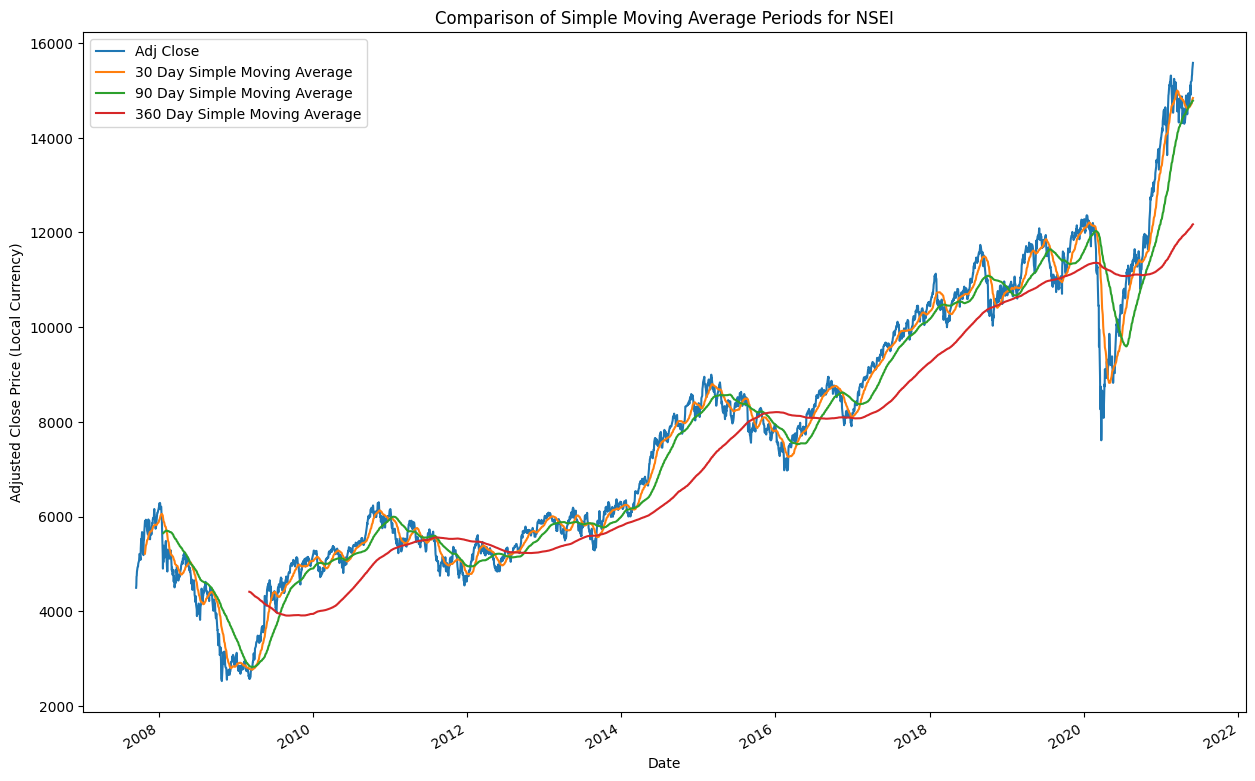

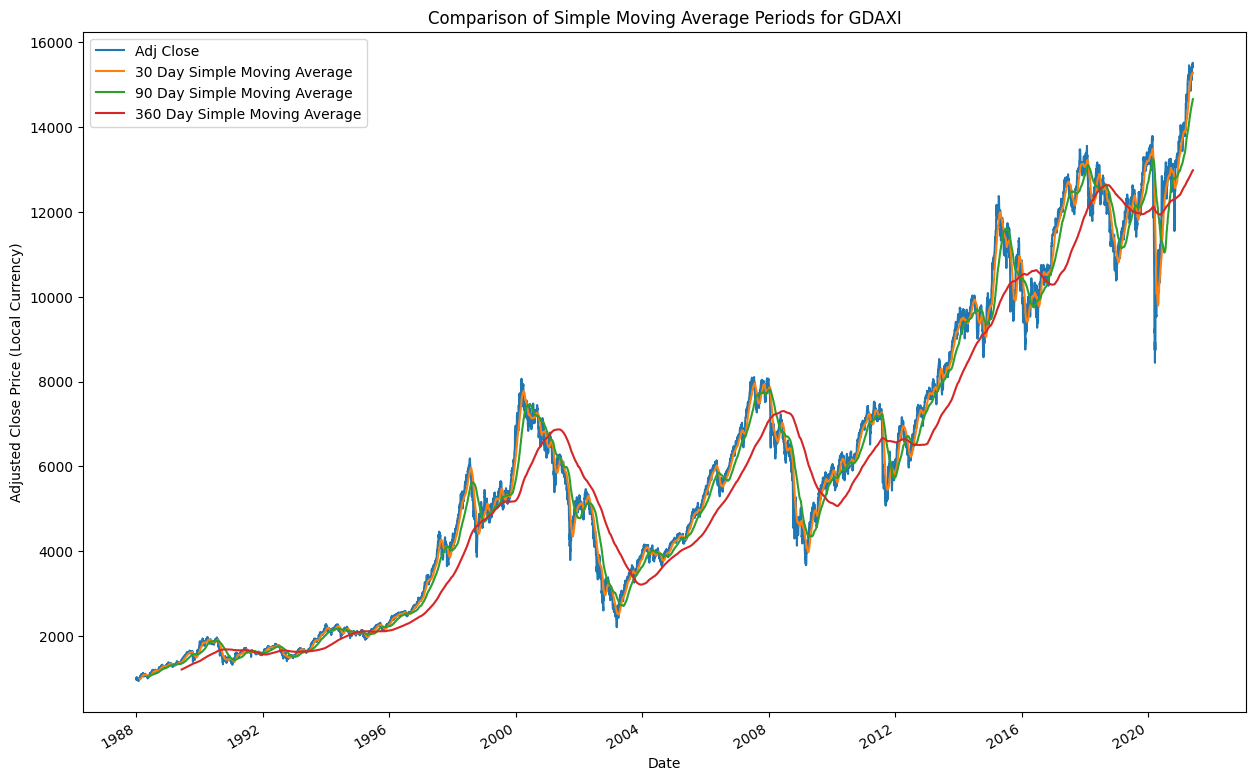

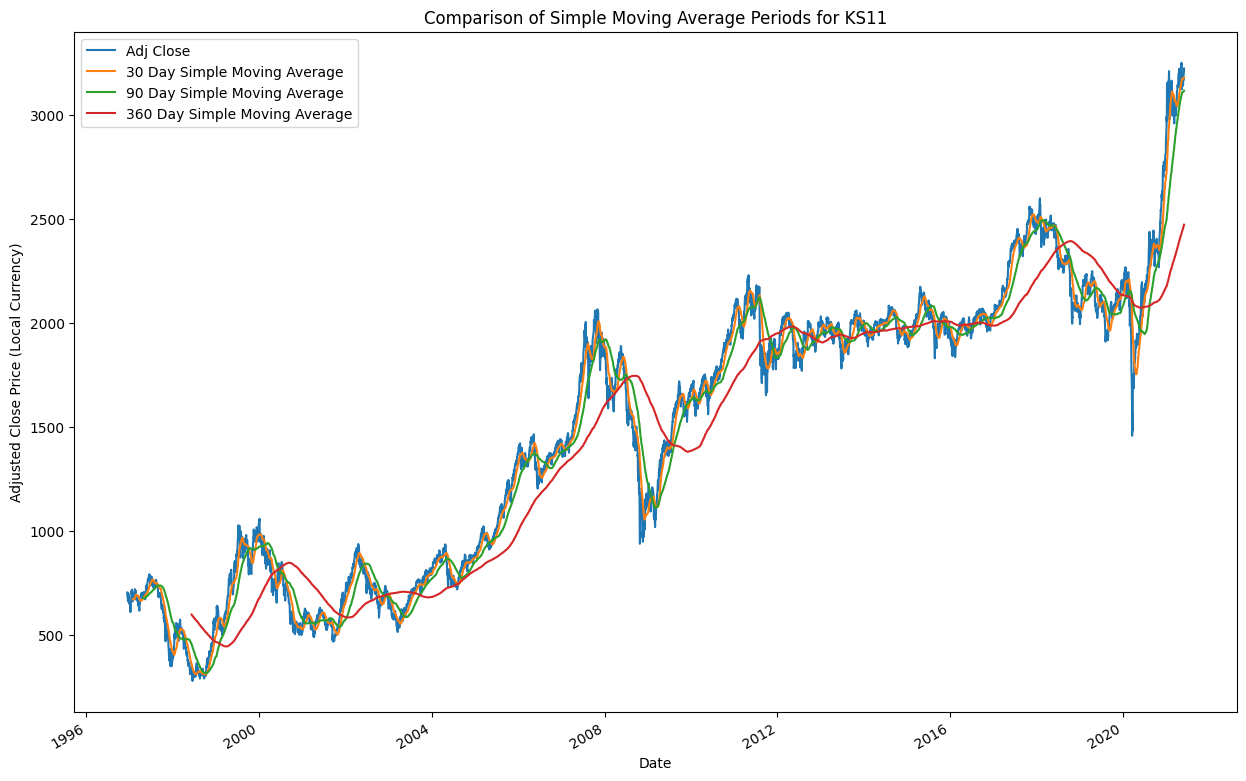

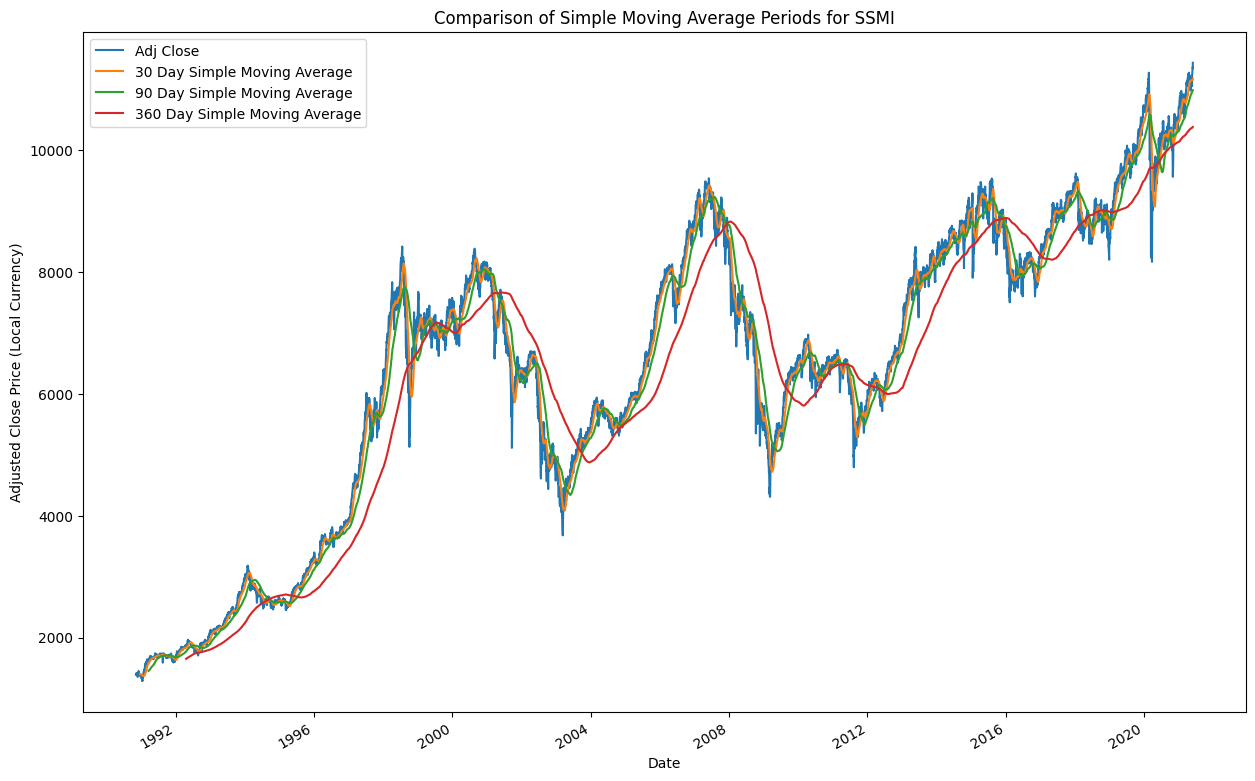

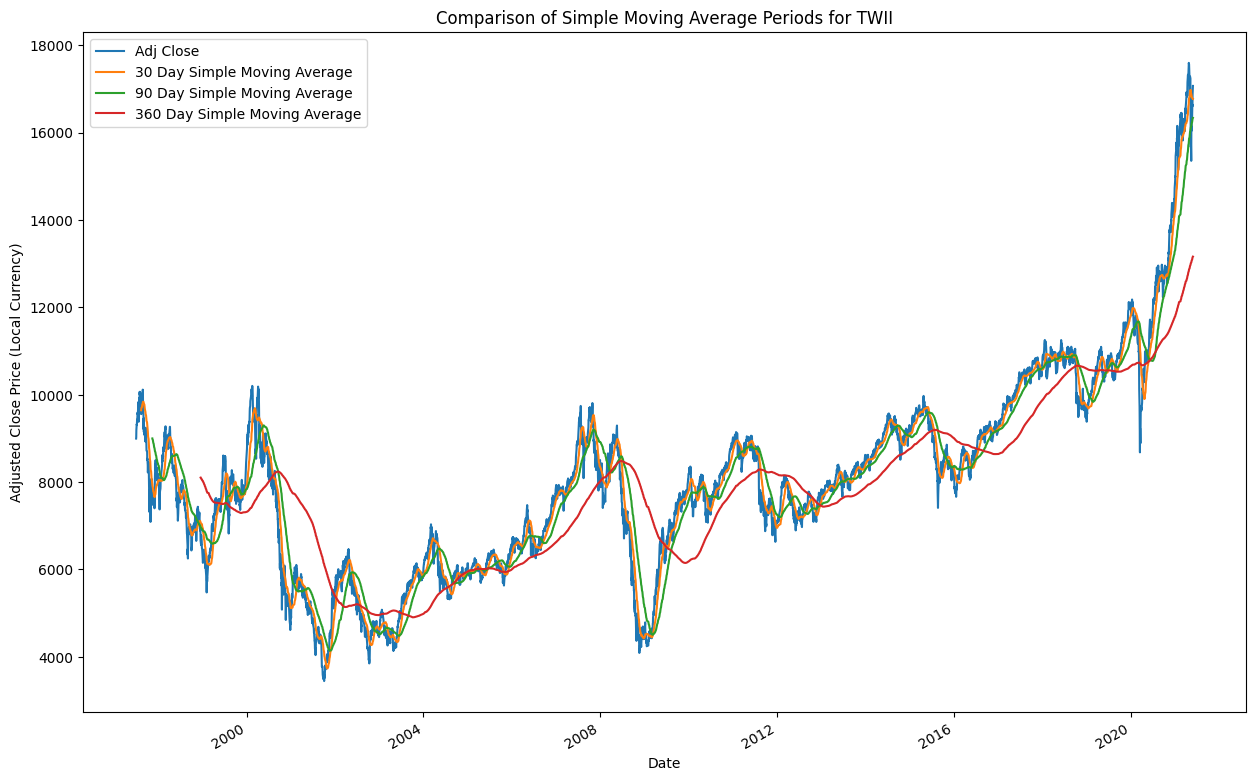

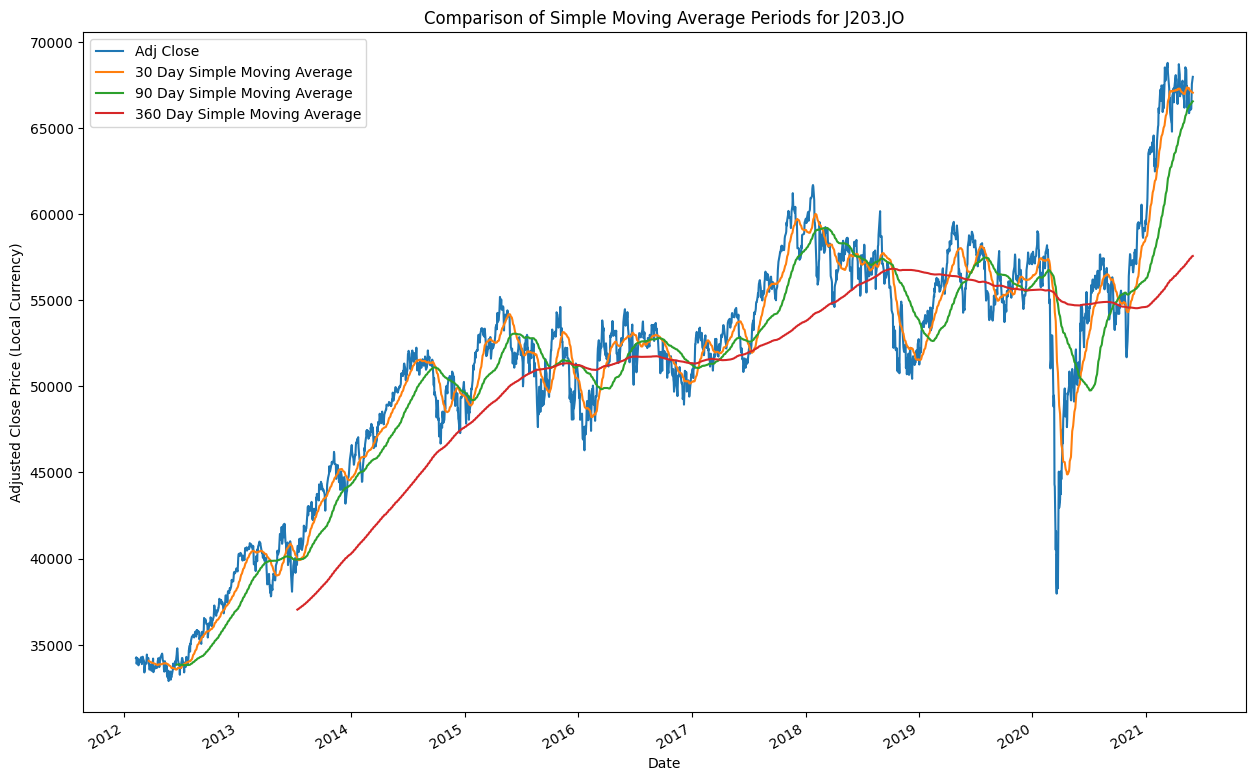

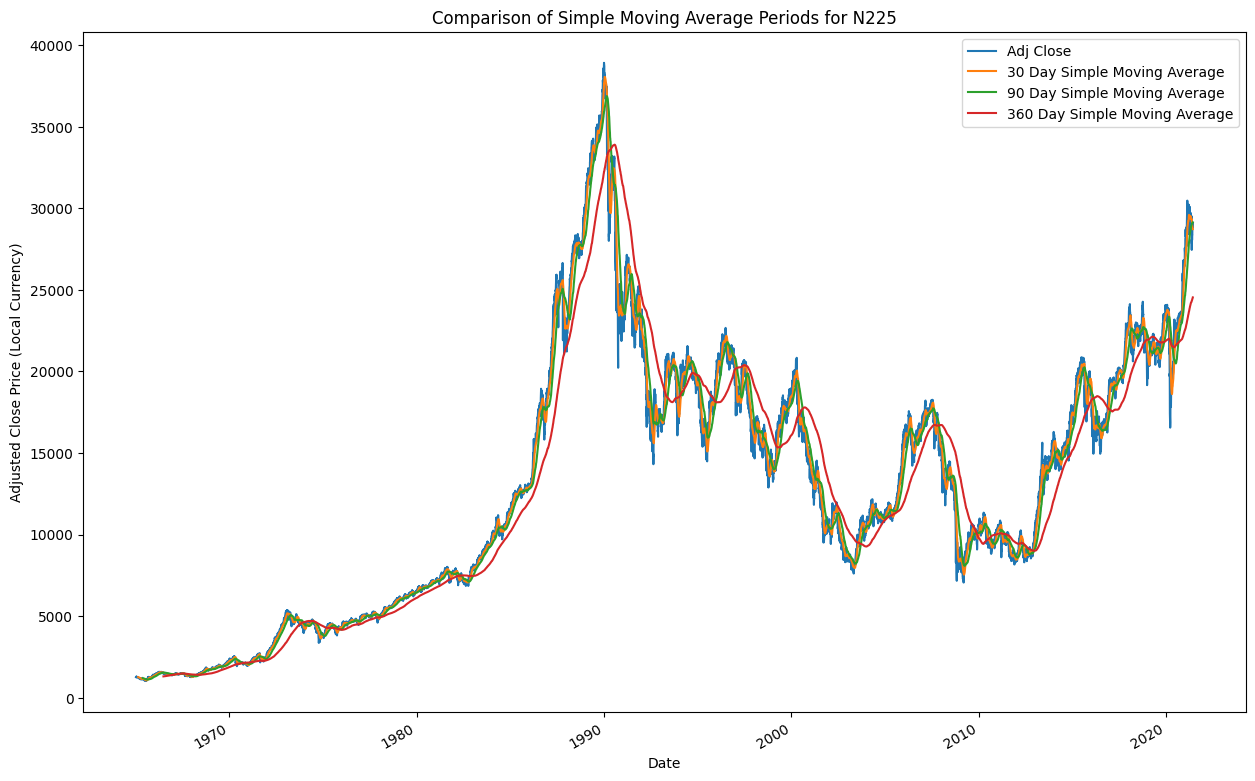

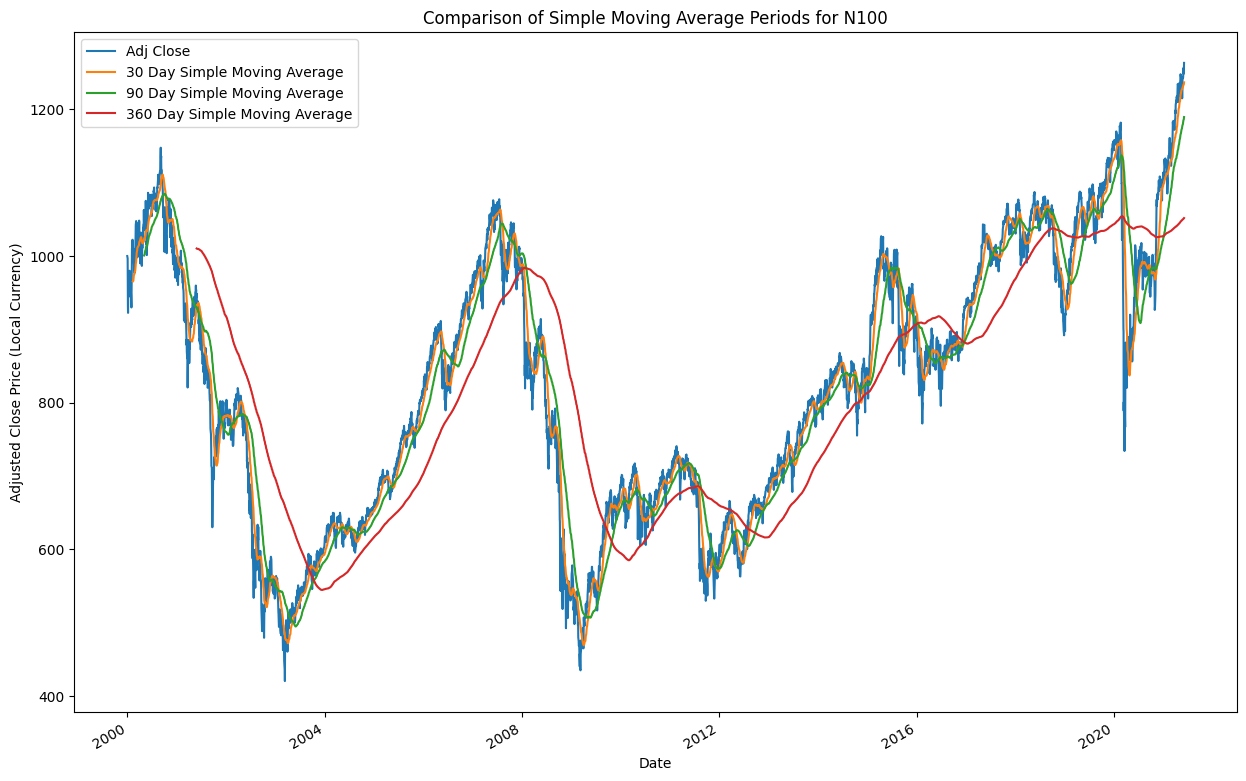

In [146]:
# Calculate simple moving averages for each index.
for index in data["Index"].unique():
    # Increasing the window size smooths the data, but reduces the accuracy.
    data_frames_per_index[index]["30 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(30, min_periods=30).mean()
    )
    data_frames_per_index[index]["90 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(90, min_periods=90).mean()
    )
    data_frames_per_index[index]["360 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(360, min_periods=360).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Simple Moving Average",
            "90 Day Simple Moving Average",
            "360 Day Simple Moving Average",
        ],
        xlabel="Date",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Comparison of Simple Moving Average Periods for {index}",
        figsize=(15, 10),
    )


### Calculate Exponential Moving Averages


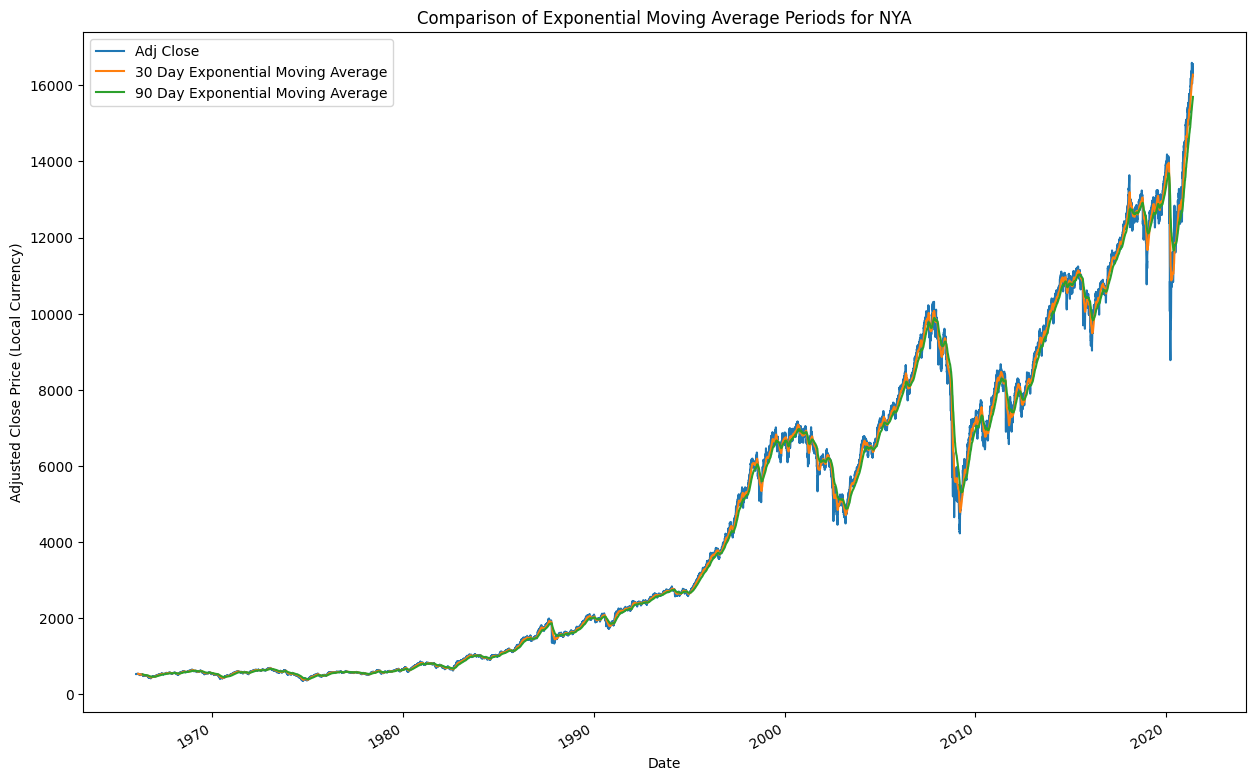

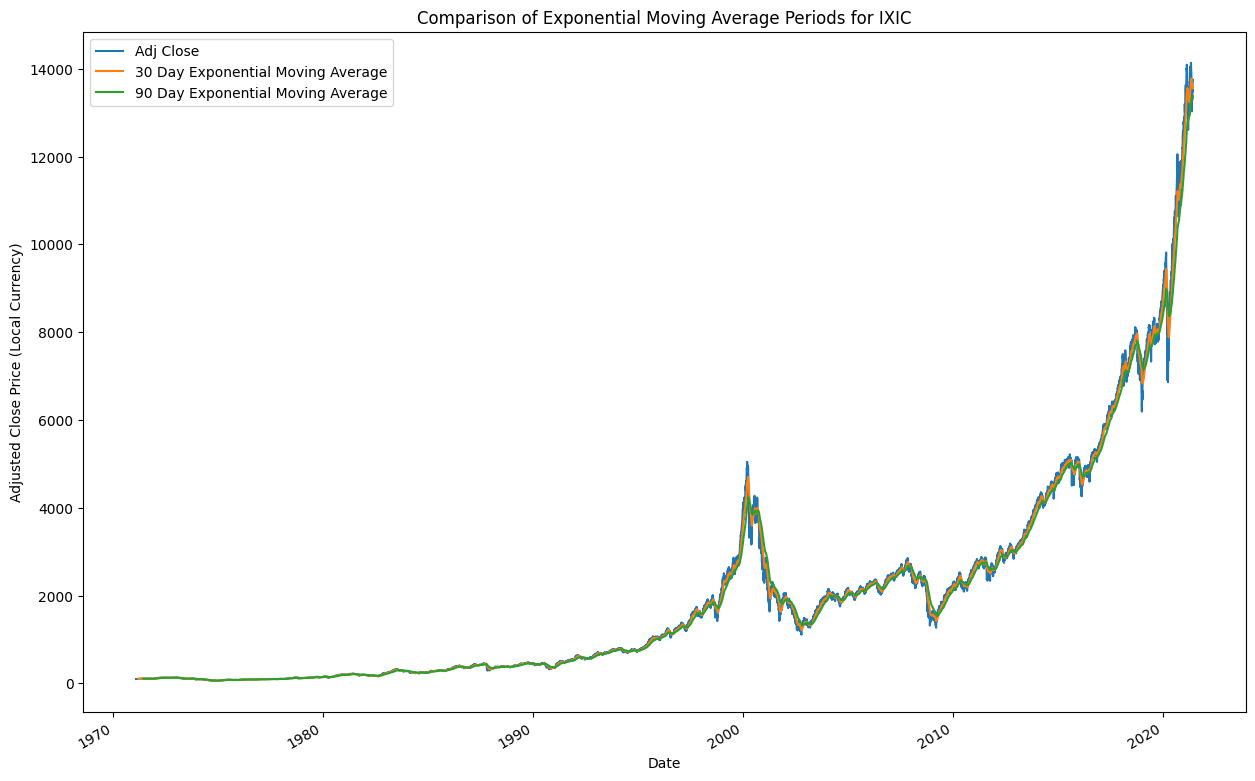

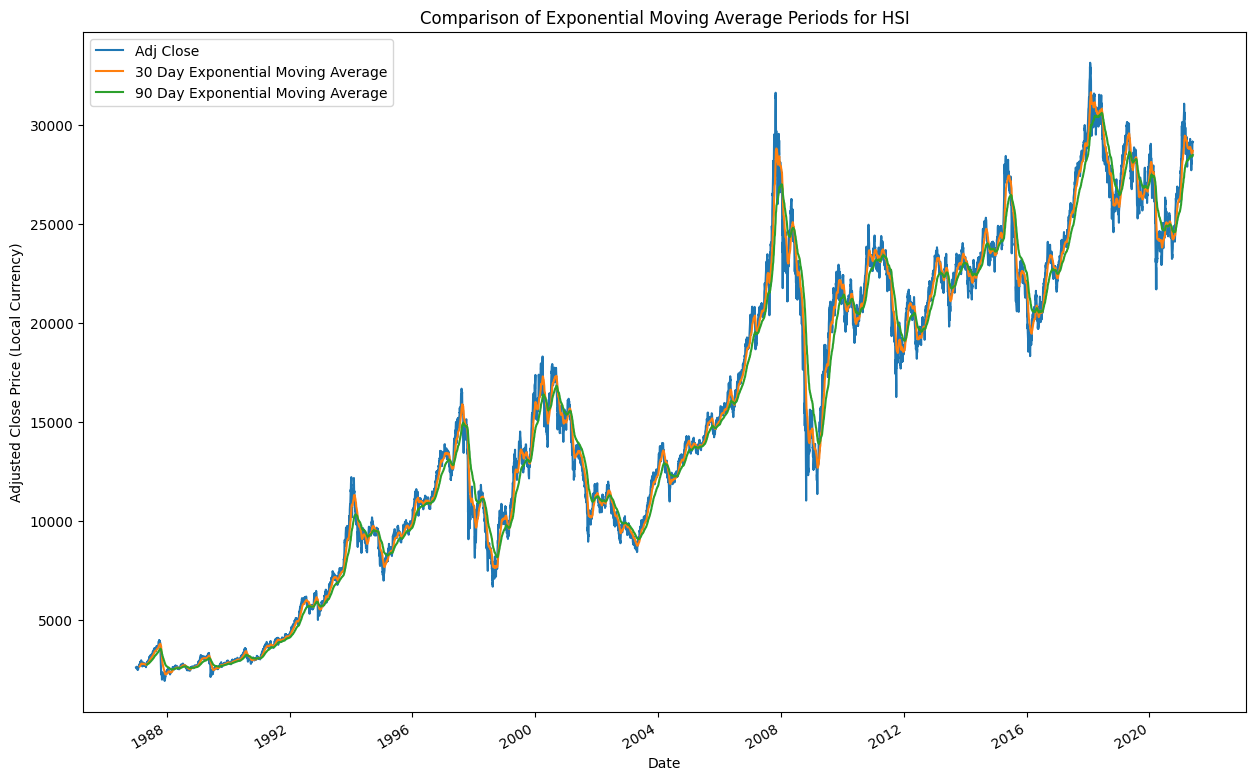

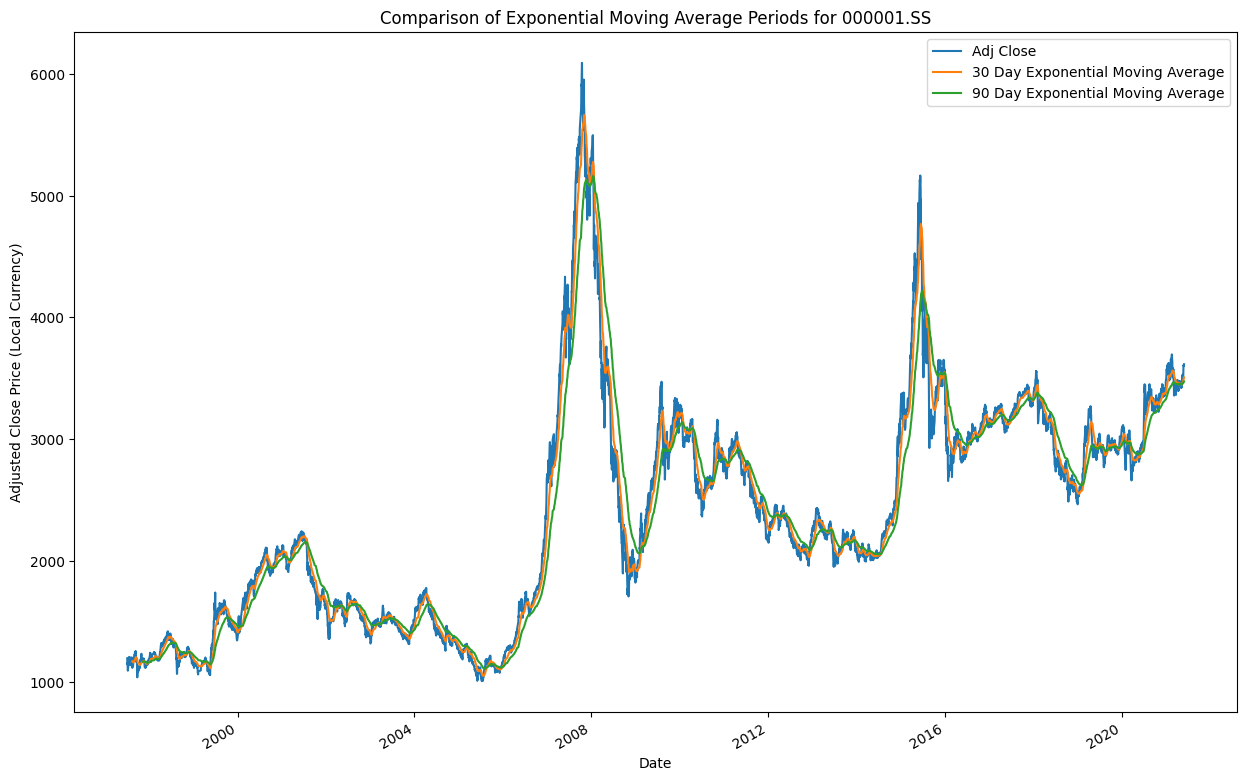

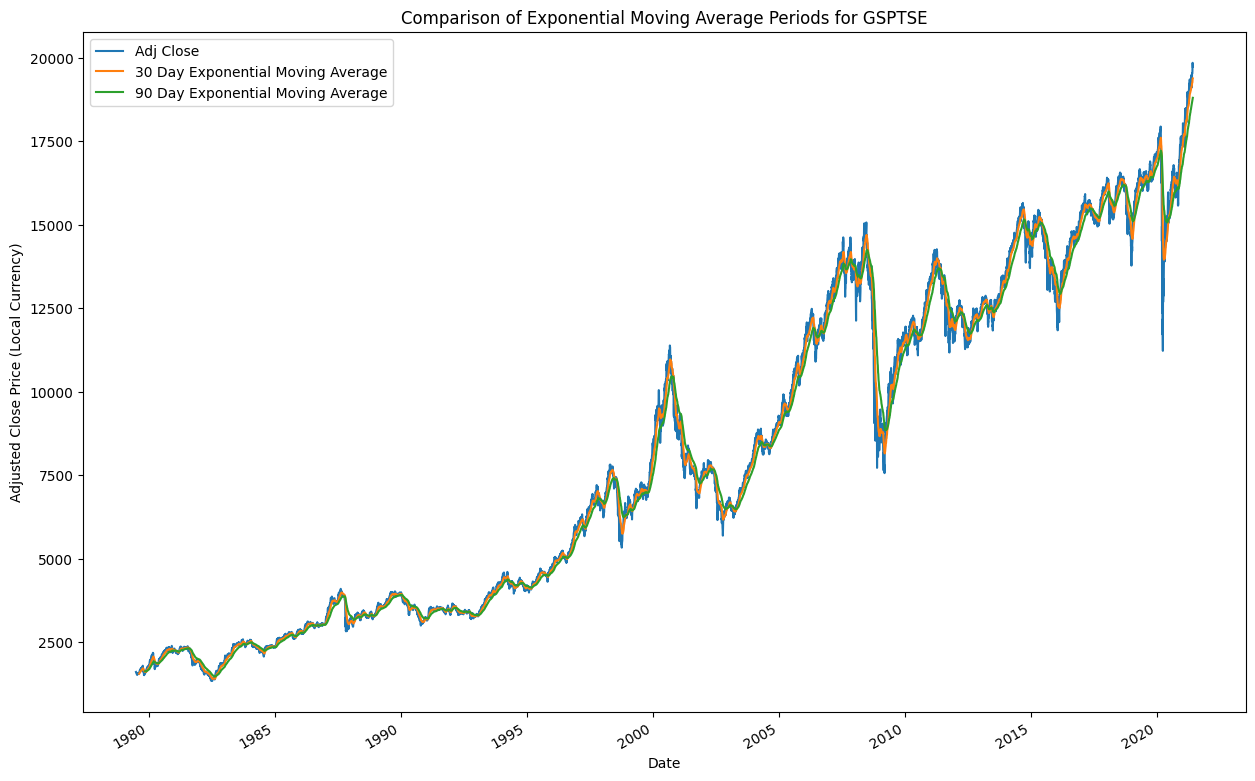

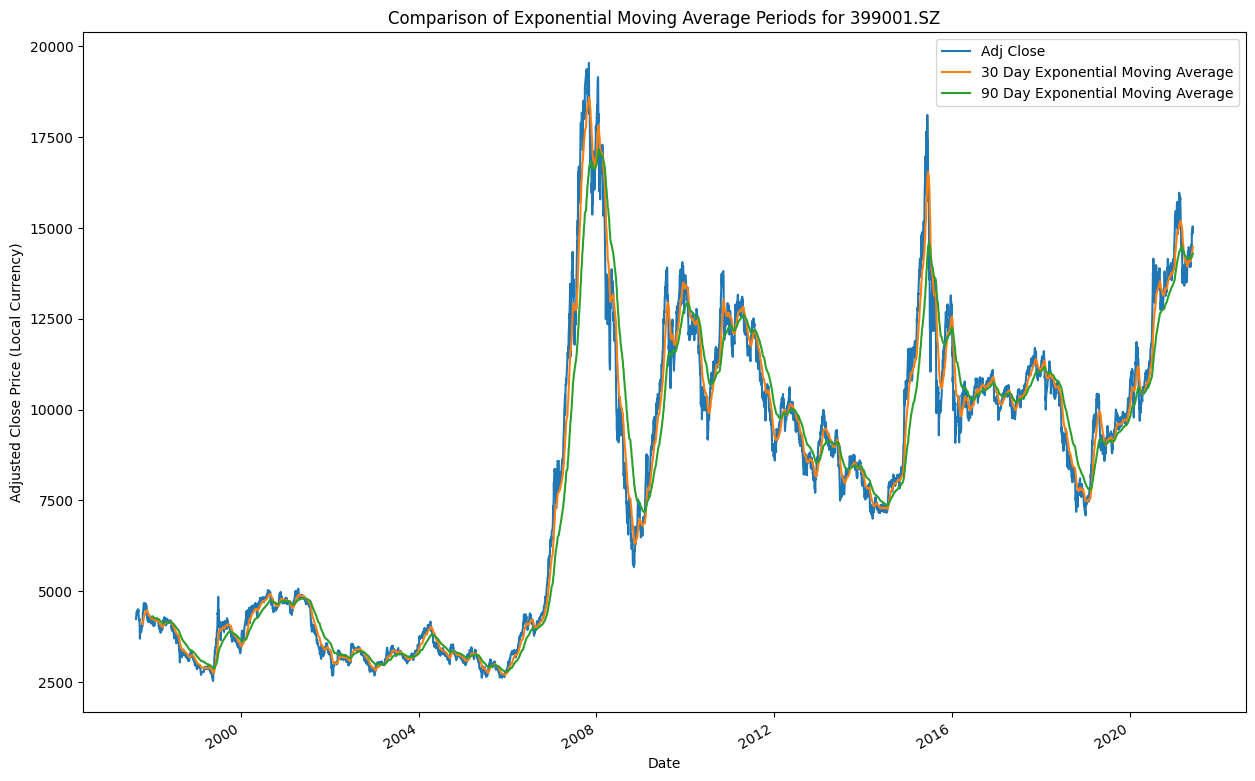

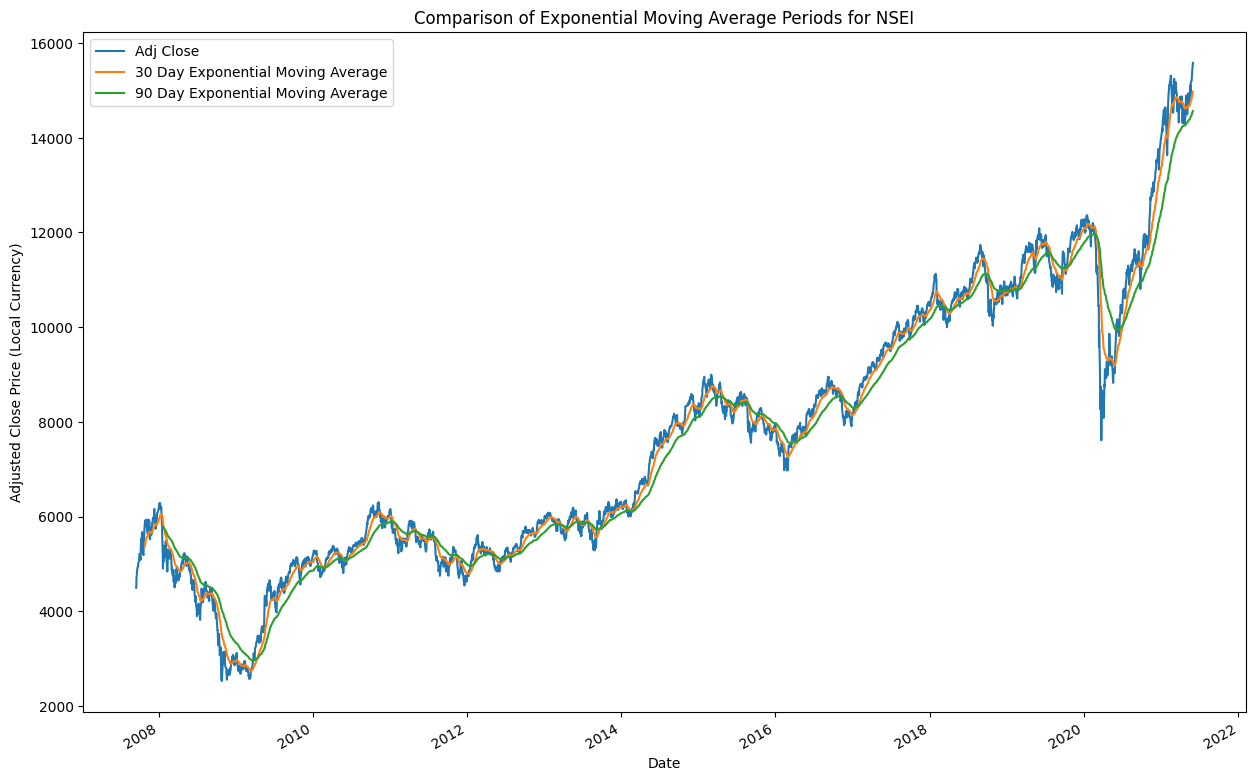

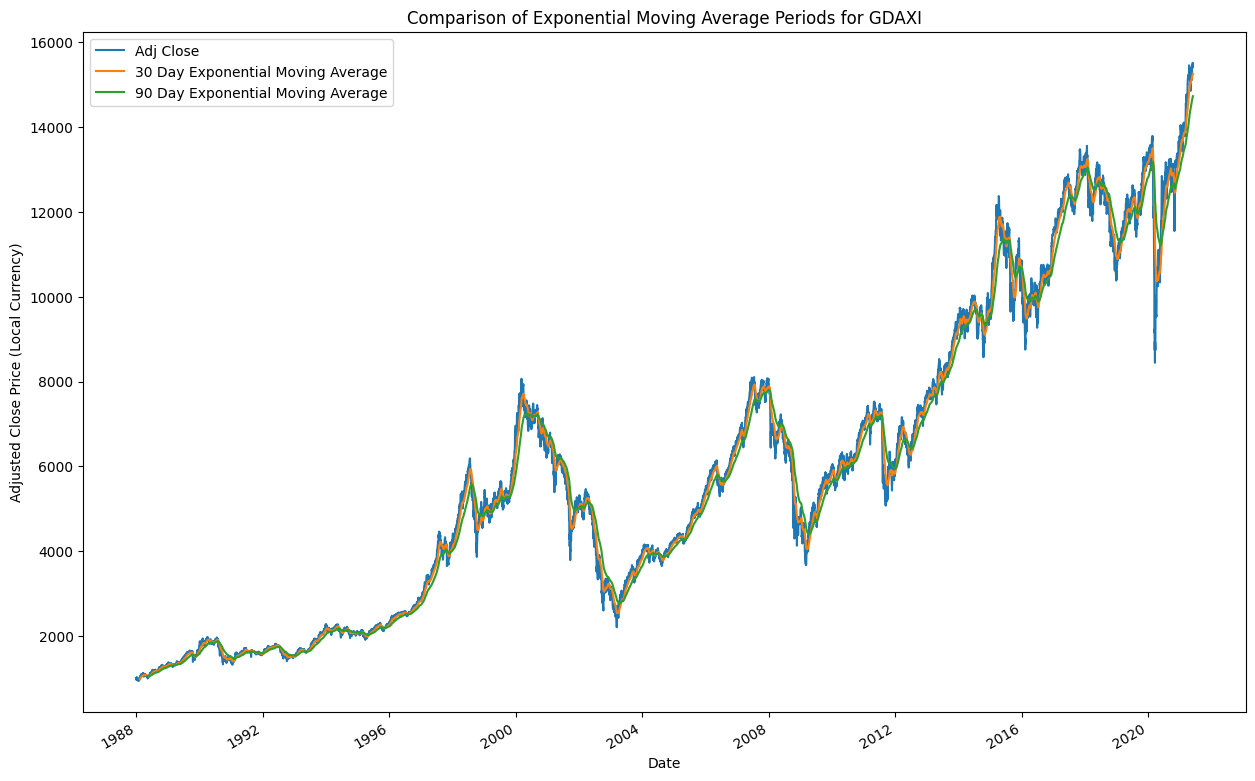

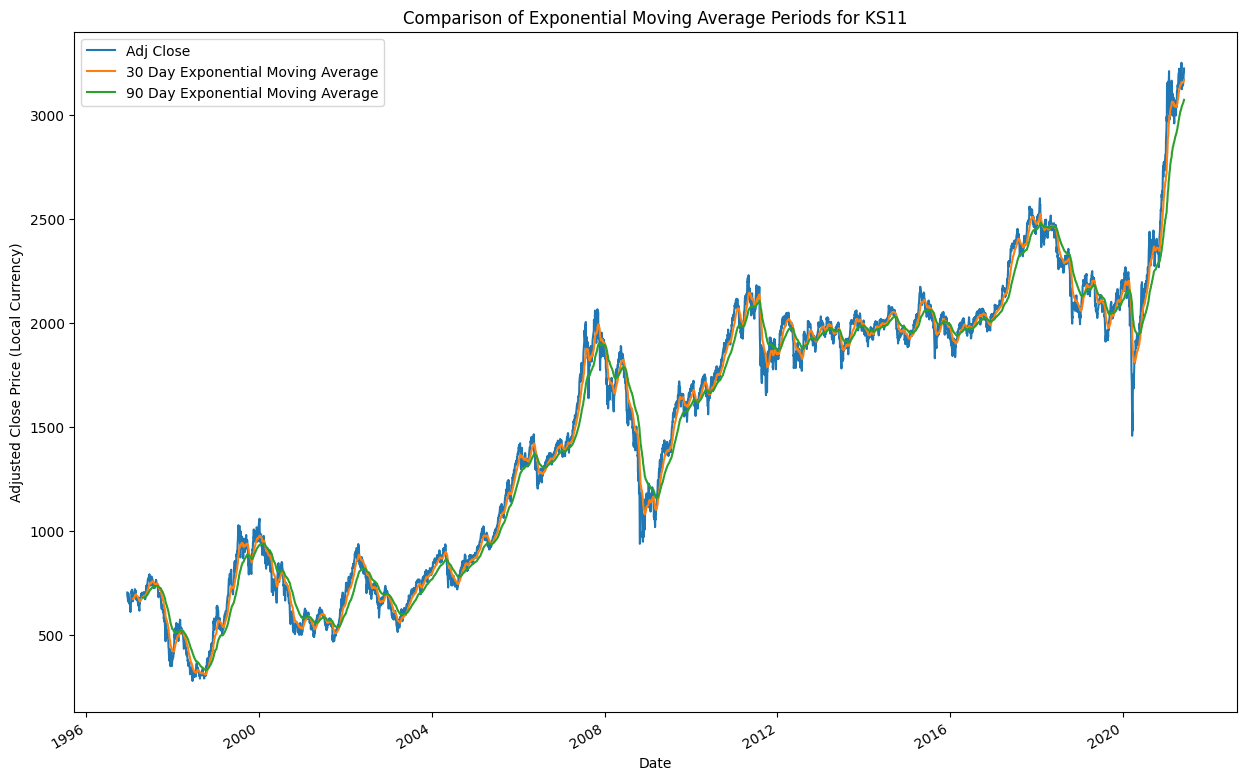

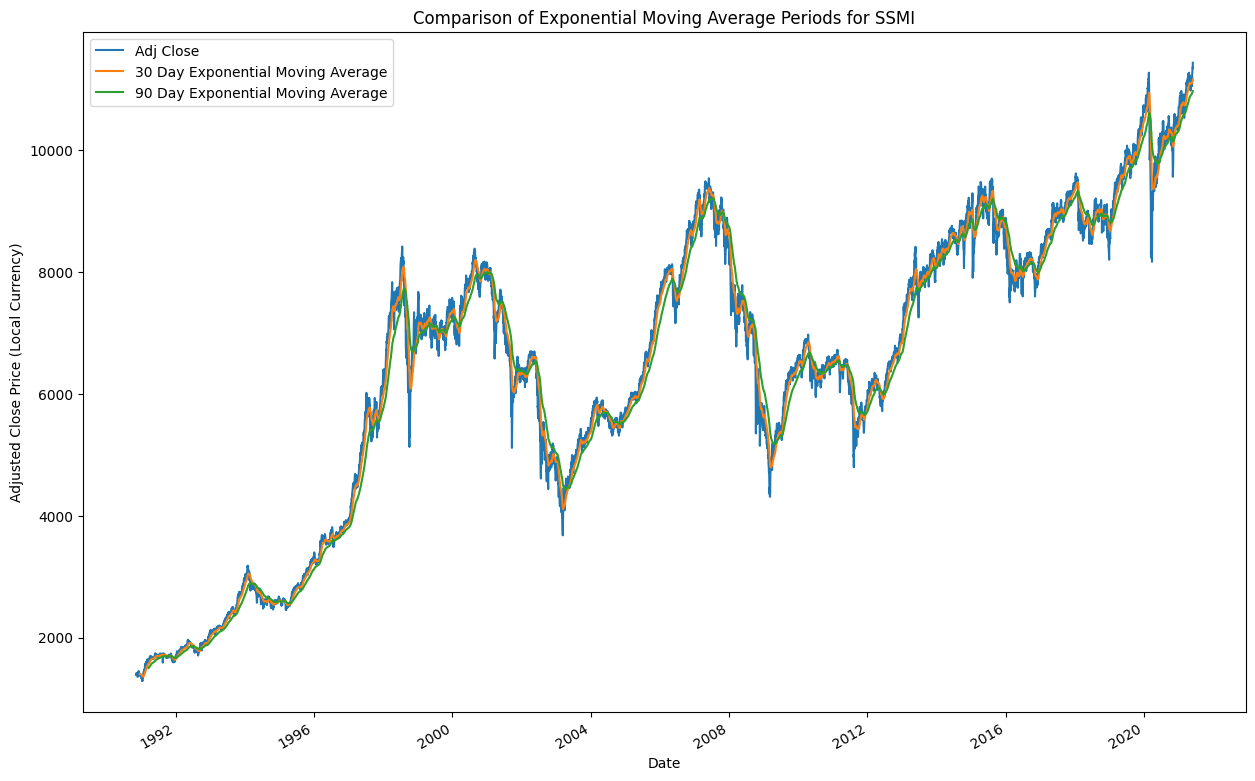

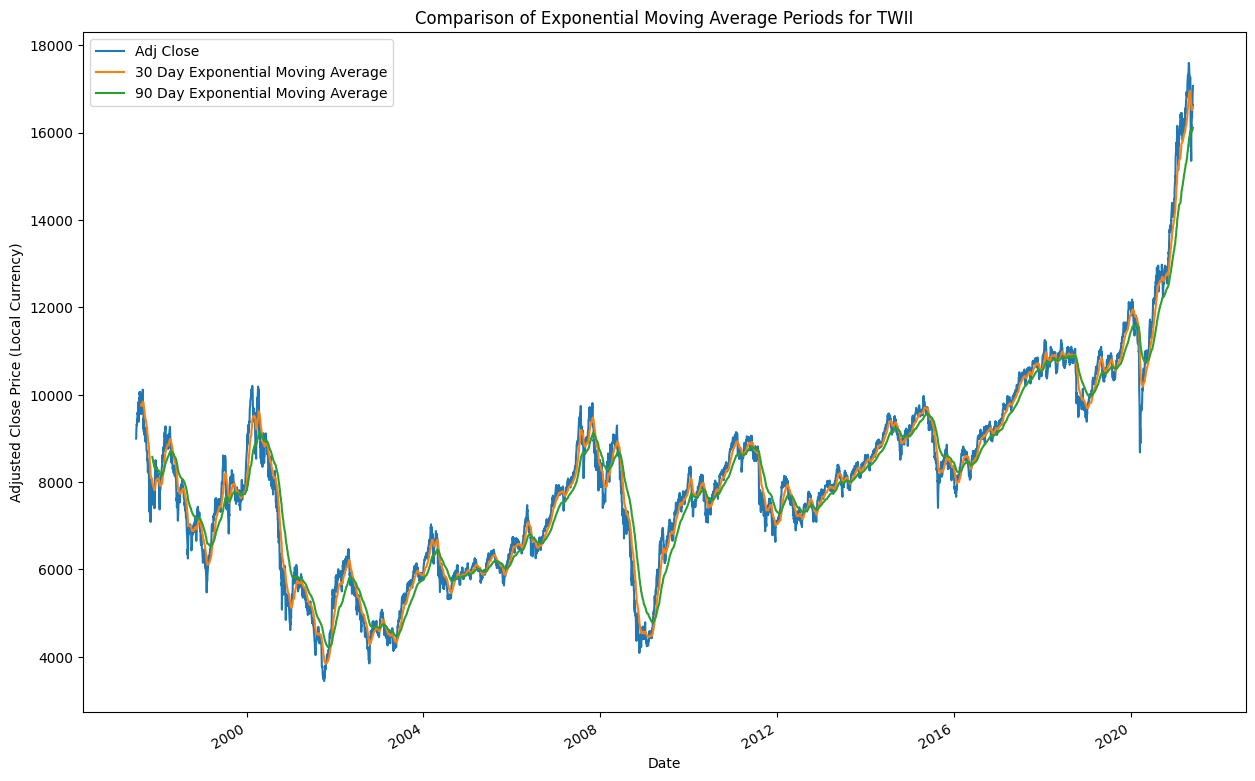

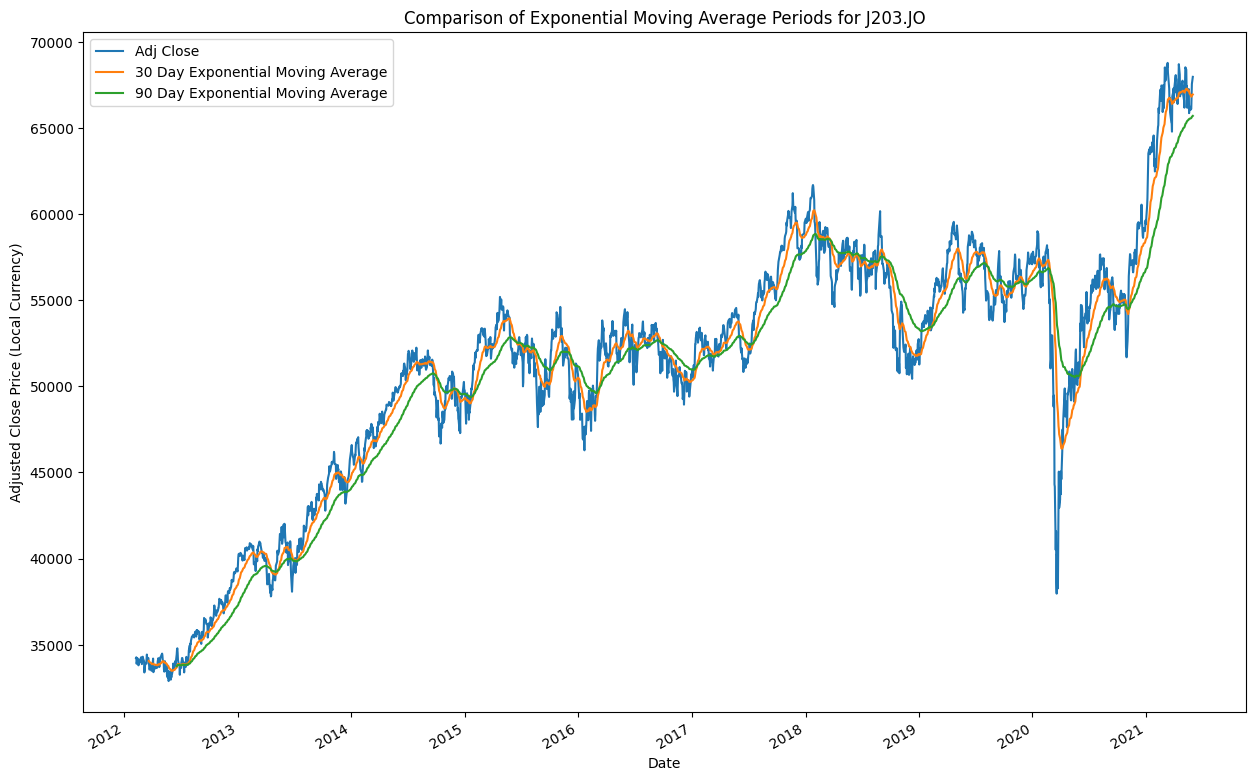

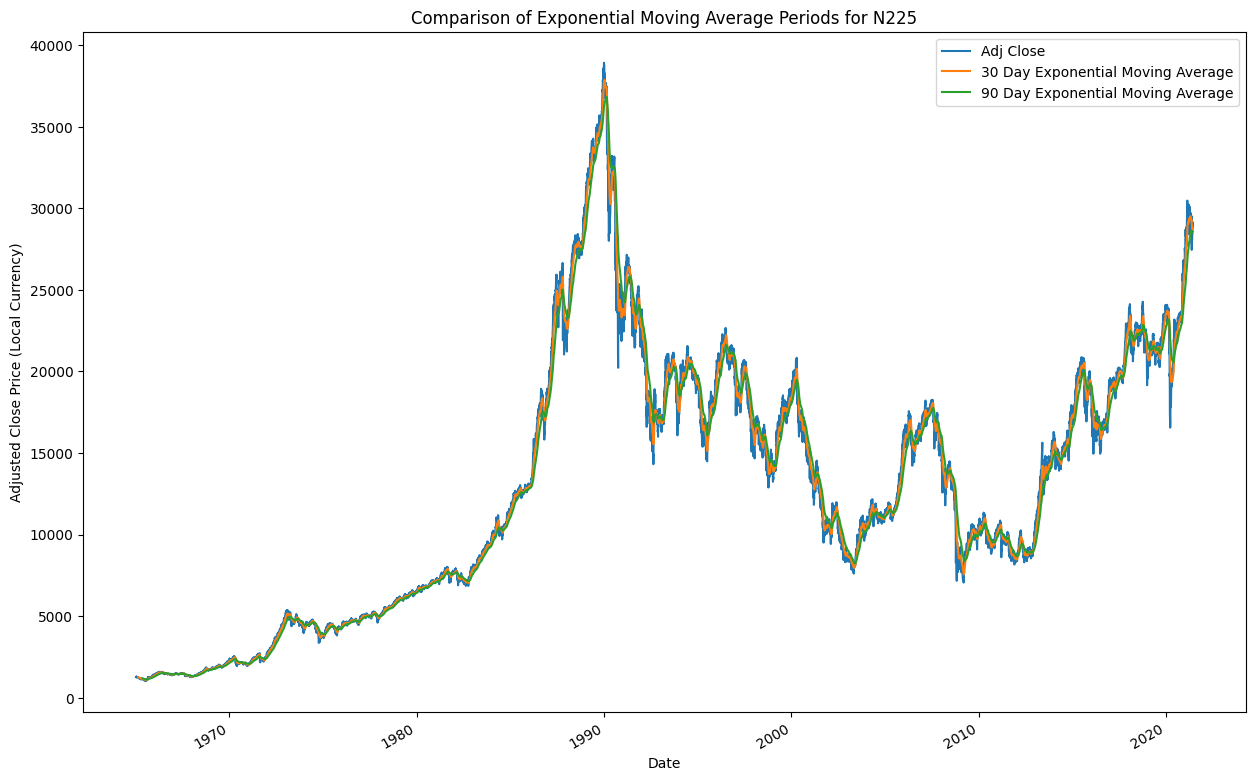

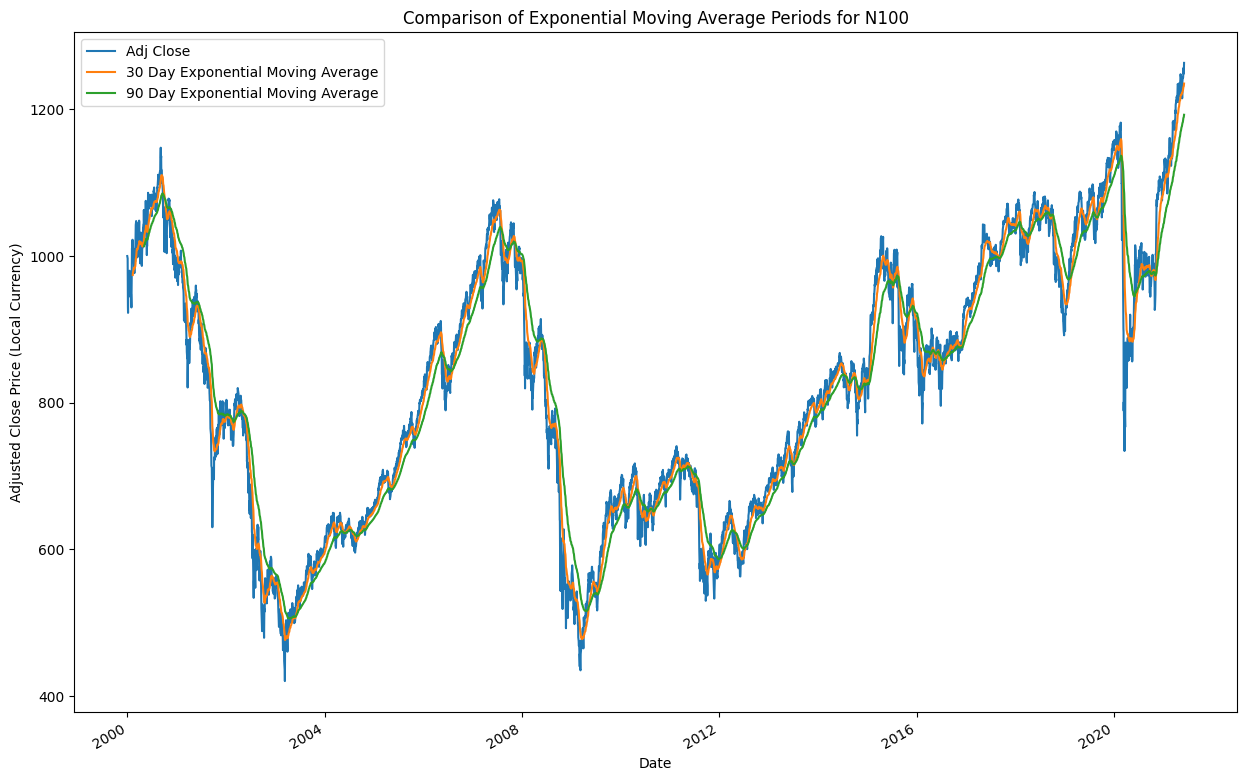

In [147]:
for index in data["Index"].unique():
    # Calculate 30 and 90 day exponential moving averages for each index.
    data_frames_per_index[index]["30 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=30, min_periods=30).mean()
    )
    data_frames_per_index[index]["90 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=90, min_periods=90).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Exponential Moving Average",
            "90 Day Exponential Moving Average",
        ],
        xlabel="Date",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Comparison of Exponential Moving Average Periods for {index}",
        figsize=(15, 10),
    )


## Data Filtering


### Select Moving Average Strategy


<AxesSubplot: title={'center': 'Comparison of Moving Average Strategies for New York Stock Exchange (NYA) - Last 5 Years'}, xlabel='Date', ylabel='Adjusted Close Price (USD)'>

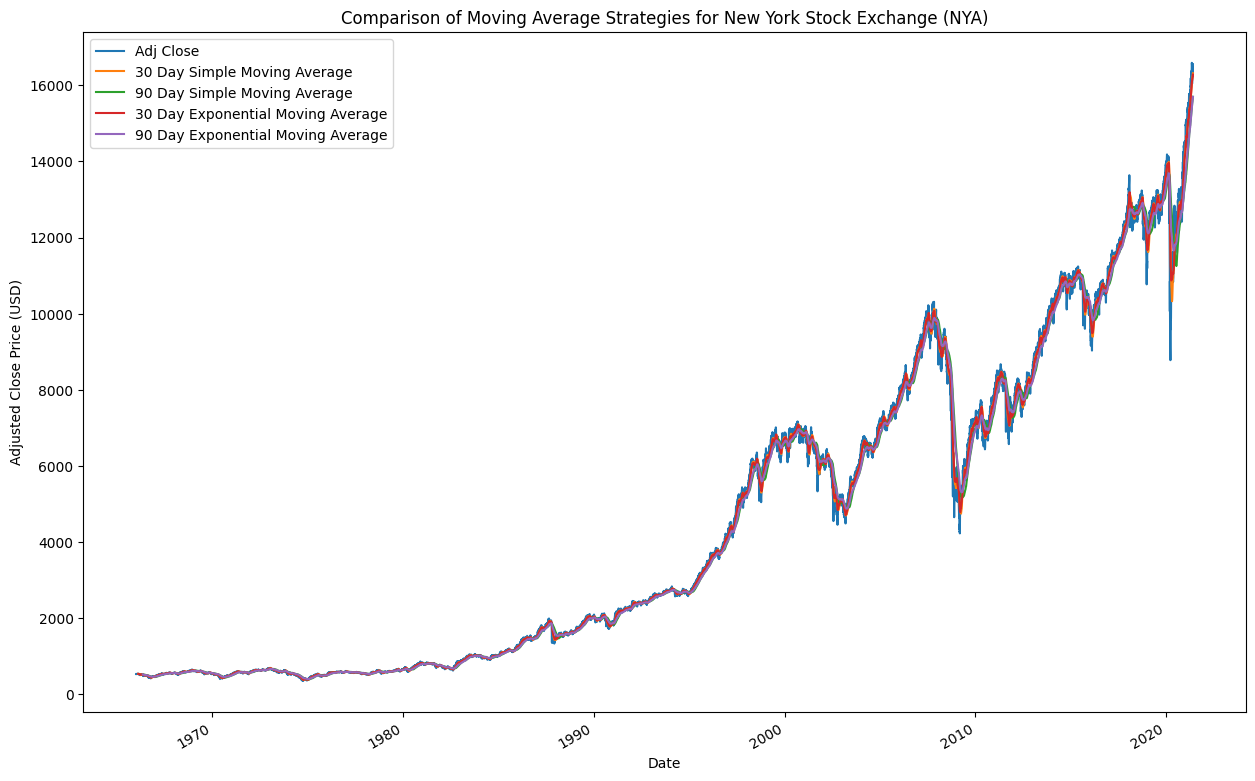

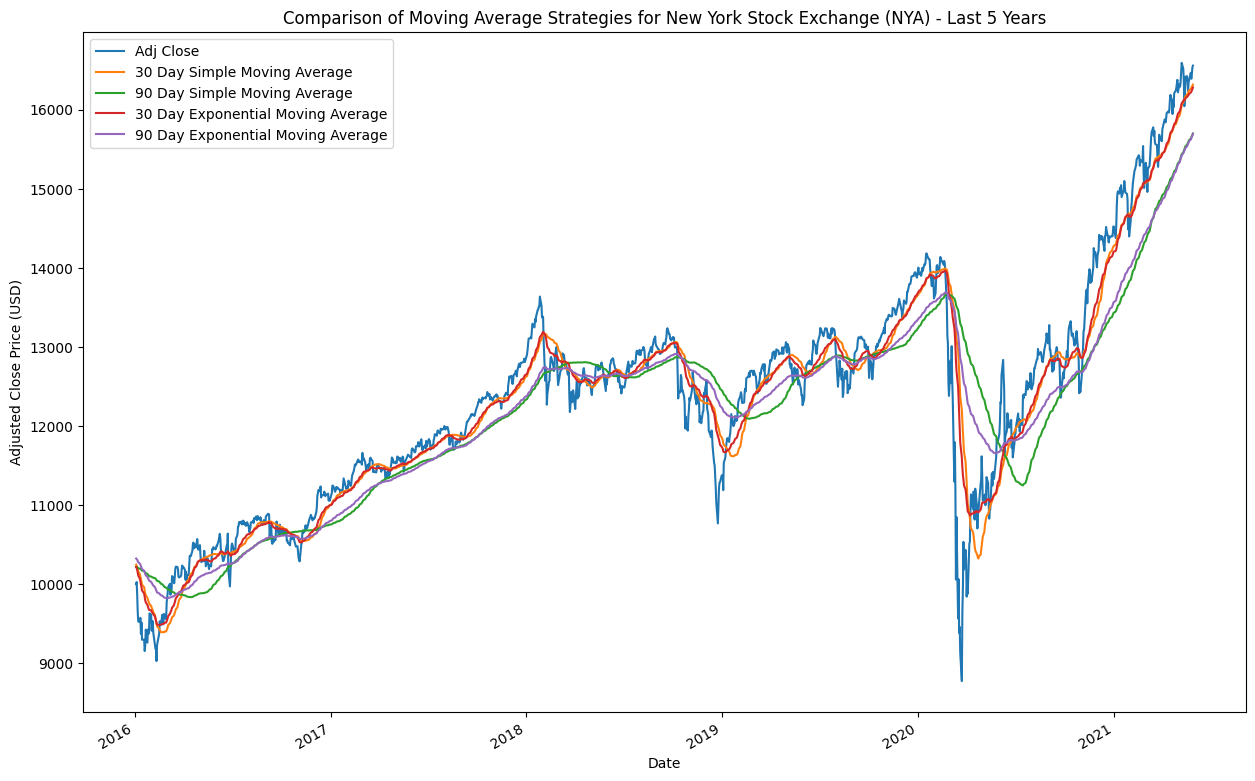

In [148]:
# Focus on the NYA data to simplify our analysis.
nya_data = data_frames_per_index["NYA"]

# Plot the NYA data to compare how the moving average strategies perform.
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Comparison of Moving Average Strategies for New York Stock Exchange (NYA)",
    figsize=(15, 10),
)

# Plot the NYA data from the last five years to zoom into how the moving
# average strategies perform.
nya_data_last_5y = nya_data[(nya_data["Date"] > "2016-01-01")]
nya_data_last_5y.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Comparison of Moving Average Strategies for New York Stock Exchange (NYA) - Last 5 Years",
    figsize=(15, 10),
)


### Show Final Data After Preprocessing


<AxesSubplot: title={'center': 'Time Series Graph for New York Stock Exchange (NYA) - Last 5 Years'}, xlabel='Date', ylabel='Adjusted Close Price (USD)'>

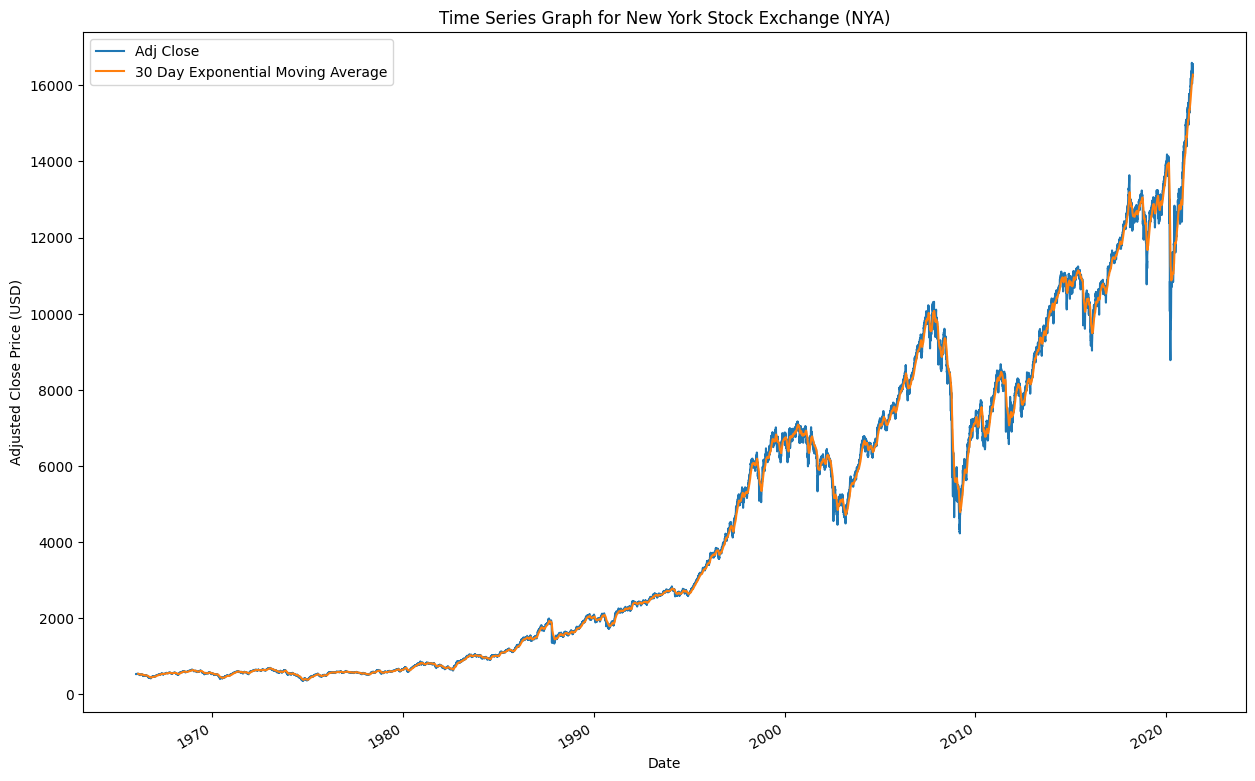

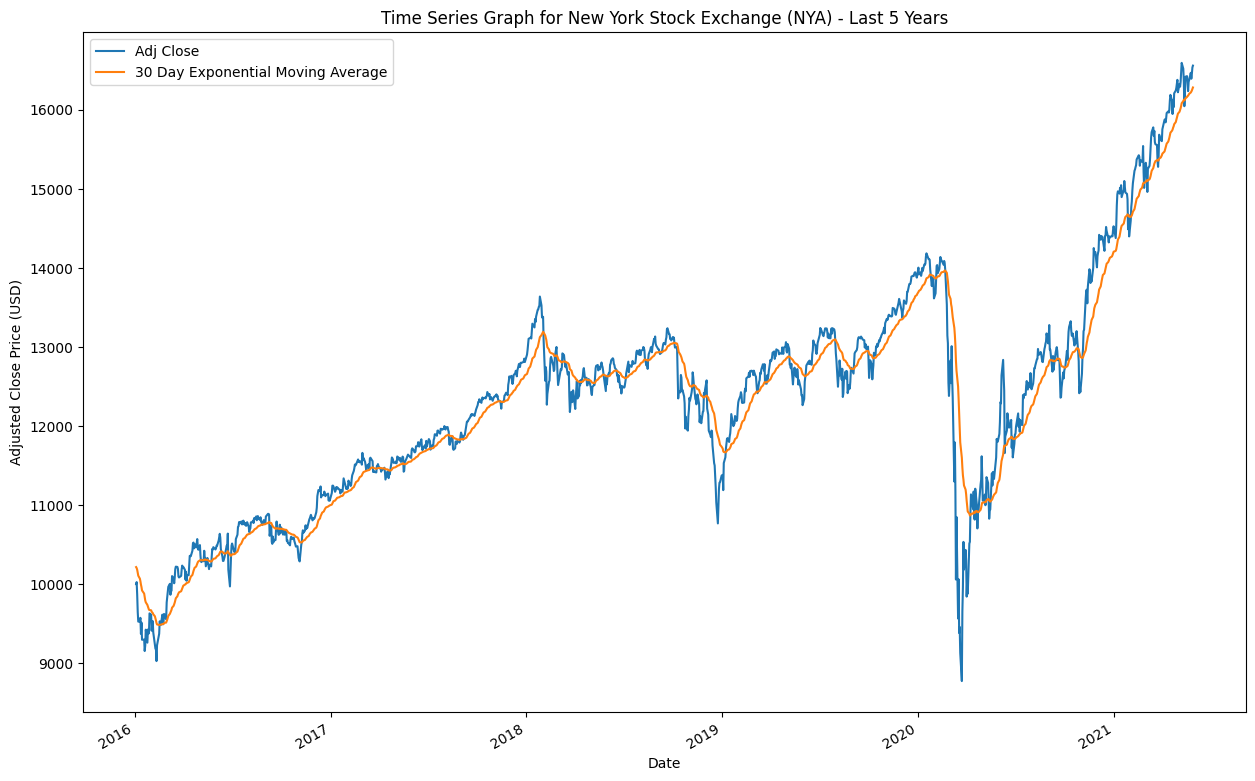

In [149]:
# Plot the NYA data to show what we're working with.
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA)",
    figsize=(15, 10),
)

# Show a zoomed in view using the last five years of data.
nya_data_last_5y = nya_data[nya_data["Date"] > "2016-01-01"]
# Plot the NYA data to show what we're working with.
nya_data_last_5y.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Exponential Moving Average",
    ],
    xlabel="Date",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA) - Last 5 Years",
    figsize=(15, 10),
)


## Modelling


### Generate Training and Test Data Sets for NYA Index


In [161]:
# # Shift 30 day exponential average to the future by 1 day to exclude the current day's adj close.
# # TODO: Why do my regression models still give near identical results?
nya_data["30 Day Exponential Moving Average"] = nya_data[
    "30 Day Exponential Moving Average"
].shift(1)
display(nya_data)
nya_data.dropna(inplace=True)
nya_data.reset_index(drop=True, inplace=True)
display(nya_data)
# TODO: Recalculate moving average after removing all the invalid rows.

# TODO: Add open price to the model input.
x = nya_data[["30 Day Exponential Moving Average"]]
# x = nya_data[["Open", "30 Day Exponential Moving Average"]]
y = nya_data[["Adj Close"]]
print(x)
print(y)

# Generate a training and test data set for the NYA index.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, shuffle=False)
# x_train = x_train.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
# x_test = x_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
print("Training Data:")
display(x_train)
display(y_train)
print("Test Data:")
display(x_test)
display(y_test)


Index       Date          Open          High           Low  \
0       NYA 1967-06-08    533.020020    533.020020    533.020020   
1       NYA 1967-06-09    534.500000    534.500000    534.500000   
2       NYA 1967-06-12    537.669983    537.669983    537.669983   
3       NYA 1967-06-13    540.849976    540.849976    540.849976   
4       NYA 1967-06-14    539.890015    539.890015    539.890015   
...     ...        ...           ...           ...           ...   
13581   NYA 2021-05-24  16375.000000  16508.519530  16375.000000   
13582   NYA 2021-05-25  16464.689450  16525.810550  16375.150390   
13583   NYA 2021-05-26  16390.189450  16466.339840  16388.320310   
13584   NYA 2021-05-27  16451.960940  16546.359380  16451.960940   
13585   NYA 2021-05-28  16531.949220  16588.689450  16531.949220   

              Close     Adj Close        Volume  30 Day Simple Moving Average  \
0        533.020020    533.020020  0.000000e+00                    536.873334   
1        534.500000    534.500000  0.000000e+00                    536.556000   
2        537.669983    537.669983  0.000000e+00                    536.312667   
3        540.849976    540.849976  0.000000e+00                    536.185999   
4        539.890015    539.890015  0.000000e+00                    536.041333   
...             ...           ...           ...                           ...   
13581  16464.689450  16464.689450  2.947400e+09                  16260.583985   
13582  16390.189450  16390.189450  3.420870e+09                  16274.845638   
13583  16451.960940  16451.960940  3.674490e+09                  16289.905990   
13584  16531.949220  16531.949220  5.201110e+09                  16303.742644   
13585  16555.660160  16555.660160  4.199270e+09                  16316.054981   

       90 Day Simple Moving Average  360 Day Simple Moving Average  \
0                        523.050889                     496.232917   
1                        523.426778                     496.251417   
2                        523.843777                     496.269611   
3                        524.303221                     496.294000   
4                        524.734333                     496.314250   
...                             ...                            ...   
13581                  15632.470508                   13456.672607   
13582                  15647.423947                   13463.869773   
13583                  15664.732737                   13471.148359   
13584                  15681.895063                   13478.489190   
13585                  15698.099284                   13485.866051   

       30 Day Exponential Moving Average  90 Day Exponential Moving Average  
0                                    NaN                         520.734884  
1                             531.937268                         521.037509  
2                             531.516152                         521.403170  
3                             531.422207                         521.830700  
4                             531.525291                         522.227725  
...                                  ...                                ...  
13581                       16171.491212                       15621.557979  
13582                       16175.480186                       15638.450979  
13583                       16186.768574                       15656.330318  
13584                       16198.912537                       15675.574690  
13585                       16216.059434                       15694.917228  

[13586 rows x 13 columns]

Index       Date          Open          High           Low  \
0       NYA 1967-06-09    534.500000    534.500000    534.500000   
1       NYA 1967-06-12    537.669983    537.669983    537.669983   
2       NYA 1967-06-13    540.849976    540.849976    540.849976   
3       NYA 1967-06-14    539.890015    539.890015    539.890015   
4       NYA 1967-06-15    540.739990    540.739990    540.739990   
...     ...        ...           ...           ...           ...   
13580   NYA 2021-05-24  16375.000000  16508.519530  16375.000000   
13581   NYA 2021-05-25  16464.689450  16525.810550  16375.150390   
13582   NYA 2021-05-26  16390.189450  16466.339840  16388.320310   
13583   NYA 2021-05-27  16451.960940  16546.359380  16451.960940   
13584   NYA 2021-05-28  16531.949220  16588.689450  16531.949220   

              Close     Adj Close        Volume  30 Day Simple Moving Average  \
0        534.500000    534.500000  0.000000e+00                    536.556000   
1        537.669983    537.669983  0.000000e+00                    536.312667   
2        540.849976    540.849976  0.000000e+00                    536.185999   
3        539.890015    539.890015  0.000000e+00                    536.041333   
4        540.739990    540.739990  0.000000e+00                    535.879334   
...             ...           ...           ...                           ...   
13580  16464.689450  16464.689450  2.947400e+09                  16260.583985   
13581  16390.189450  16390.189450  3.420870e+09                  16274.845638   
13582  16451.960940  16451.960940  3.674490e+09                  16289.905990   
13583  16531.949220  16531.949220  5.201110e+09                  16303.742644   
13584  16555.660160  16555.660160  4.199270e+09                  16316.054981   

       90 Day Simple Moving Average  360 Day Simple Moving Average  \
0                        523.426778                     496.251417   
1                        523.843777                     496.269611   
2                        524.303221                     496.294000   
3                        524.734333                     496.314250   
4                        525.134999                     496.333333   
...                             ...                            ...   
13580                  15632.470508                   13456.672607   
13581                  15647.423947                   13463.869773   
13582                  15664.732737                   13471.148359   
13583                  15681.895063                   13478.489190   
13584                  15698.099284                   13485.866051   

       30 Day Exponential Moving Average  90 Day Exponential Moving Average  
0                             531.937268                         521.037509  
1                             531.516152                         521.403170  
2                             531.422207                         521.830700  
3                             531.525291                         522.227725  
4                             531.717208                         522.634705  
...                                  ...                                ...  
13580                       16171.491212                       15621.557979  
13581                       16175.480186                       15638.450979  
13582                       16186.768574                       15656.330318  
13583                       16198.912537                       15675.574690  
13584                       16216.059434                       15694.917228  

[13585 rows x 13 columns]

       30 Day Exponential Moving Average
0                             531.937268
1                             531.516152
2                             531.422207
3                             531.525291
4                             531.717208
...                                  ...
13580                       16171.491212
13581                       16175.480186
13582                       16186.768574
13583                       16198.912537
13584                       16216.059434

[13585 rows x 1 columns]
          Adj Close
0        534.500000
1        537.669983
2        540.849976
3        539.890015
4        540.739990
...             ...
13580  16464.689450
13581  16390.189450
13582  16451.960940
13583  16531.949220
13584  16555.660160

[13585 rows x 1 columns]
Training Data:


30 Day Exponential Moving Average
0                             531.937268
1                             531.516152
2                             531.422207
3                             531.525291
4                             531.717208
...                                  ...
10863                        6882.775911
10864                        6899.821996
10865                        6918.036070
10866                        6934.567292
10867                        6948.706190

[10868 rows x 1 columns]

Adj Close
0       534.500000
1       537.669983
2       540.849976
3       539.890015
4       540.739990
...            ...
10863  7153.720215
10864  7188.299805
10865  7139.750000
10866  6902.709961
10867  6881.939941

[10868 rows x 1 columns]

Test Data:


30 Day Exponential Moving Average
10868                        6964.163843
10869                        6975.491982
10870                        6970.796368
10871                        6965.063695
10872                        6958.352492
...                                  ...
13580                       16171.491212
13581                       16175.480186
13582                       16186.768574
13583                       16198.912537
13584                       16216.059434

[2717 rows x 1 columns]

Adj Close
10868   6861.040039
10869   6871.580078
10870   6959.790039
10871   6968.080078
10872   6850.450195
...             ...
13580  16464.689450
13581  16390.189450
13582  16451.960940
13583  16531.949220
13584  16555.660160

[2717 rows x 1 columns]

### Ridge Regression


In [162]:
# Define the ridge regression model.
ridge_model = Ridge()
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)

print(f"Model Score: {ridge_model.score(x_test, y_test)}")
print(f"R^2: {metrics.r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred)}")
print(
    f"Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}"
)


Model Score: 0.9716843621140331
R^2: 0.9716843621140331
Mean Absolute Error (MAE): 234.0436760450809
Mean Squared Error (RMSE): 354.07862573620486


### LASSO Regression

In [163]:
# Define the LASSO regression model.
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

print(f"Model Score: {lasso_model.score(x_test, y_test)}")
print(f"R^2: {metrics.r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred)}")
print(
    f"Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}"
)


Model Score: 0.971684338265061
R^2: 0.971684338265061
Mean Absolute Error (MAE): 234.0440277601731
Mean Squared Error (RMSE): 354.07877484832306


## Analysis of Results
